In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from scipy.stats import chisquare
from fermipy.gtanalysis import GTAnalysis
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS

In [222]:
print(gta.roi['4FGL J0534.5+2200'])

Name           : 4FGL J0534.5+2200
Associations   : ['4FGL J0534.5+2200', 'PSR J0534+2200', 'Crab IC field', 'J0534+2205', 'Crab pulsar']
RA/DEC         :     83.637/    22.015
GLON/GLAT      :    184.559/    -5.781
TS             : 57395.87
Npred          : 338029.09
Flux           : 1.725e-06 +/-  1.5e-08
EnergyFlux     : 0.0006421 +/- 4.41e-06
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff2
Spectral Parameters
b'Prefactor'   :  1.239e-10 +/-   8.62e-13
b'Index1'      :     -1.897 +/-   -0.00394
b'Scale'       :       1463 +/-        nan
b'Expfactor'   :      0.005 +/-  3.706e-07
b'Index2'      :     0.6667 +/-        nan


In [223]:
print(gta.roi['4FGL J0534.5+2201s'])

Name           : 4FGL J0534.5+2201s
Associations   : ['4FGL J0534.5+2201s', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : 3977.31
Npred          : 39425.61
Flux           : 3.614e-07 +/- 1.58e-08
EnergyFlux     : 5.004e-05 +/- 2.33e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.896e-07 +/-  9.562e-09
b'Index'       :      -4.57 +/-   -0.03788
b'Scale'       :      50.55 +/-        nan


In [224]:
print(gta.roi['4FGL J0534.5+2201i'])

Name           : 4FGL J0534.5+2201i
Associations   : ['4FGL J0534.5+2201i', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : 24969.27
Npred          : 152125.78
Flux           : 6.887e-07 +/-  1.5e-08
EnergyFlux     : 0.0005706 +/- 6.45e-06
SpatialModel   : RadialGaussian
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  7.689e-13 +/-  8.136e-15
b'alpha'       :       2.04 +/-   0.004388
b'beta'        :    0.01832 +/-   0.001382
b'Eb'          :      1e+04 +/-        nan


In [2]:
def powerlaw(p_0,p_1,x_s,x):
    F = p_0*(x/x_s)**p_1
    return F

In [3]:
def PLSuperExpCutoff(Prefactor,Index1,Index2,Expfactor,Scale,E):
    F = Prefactor*((E/Scale)**(Index1)) * np.exp(-Expfactor*(E**Index2))
    return F

In [4]:
def LogParabola(p_0,p_1,p_2,x_s,x):
    F = p_0 * (x/x_s)**(p_1 - p_2*np.log(x/x_s))
    return F

In [5]:
np.log(np.e)

1.0

In [6]:
c = np.load('Crab_5_bin_6/fit0_all_freeing.npy', allow_pickle=True).flat[0]

In [7]:
gta = GTAnalysis('new_data/config_5_6.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5_bin_6'})
gta.load_roi('fit0_all_freeing')

2022-05-17 09:08:31 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2022-05-17 09:08:31 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5_bin_6/fit0_all_freeing.npy
2022-05-17 09:08:31 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-05-17 09:08:49 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [8]:
gta.print_roi()

2022-05-17 09:08:49 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003  57395.87    338029.1
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   3977.31     39425.6
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  24969.27    152125.8
4FGL J0526.3+2246   PointSource    PowerLaw          2.037    114.29      4237.3
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     78.07      3823.2
isodiff             ConstantValue  FileFunction      -----    964.94     37206.2
galdiff             MapCubeFunctio PowerLaw          -----  74314.56    188262.7



In [9]:
gta.print_params()

2022-05-17 09:08:49 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.08     0.604     1e-05     1e+03     1e-14    *
   1 Index                     2.95     0.286         0         5        -1    *
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.24   0.00862     1e-05     1e+03     1e-10    *
   4 Index1                     1.9   0.00394         0         5        -1    *
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                  0.5  3.71e-05      -0.5       0.5      0.01    *
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.769   0.00814     1e-05     1e+03     1e-12    

4FGL J0526.3+2246

In [10]:
Prefactor2246=1.04*1e-14
Index2246=-2.97
Scale2246=4.4e+03

In [11]:
powerlaw(Prefactor2246,Index2246,Scale2246,10000)

9.08004055936802e-16

In [12]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [13]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])
dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

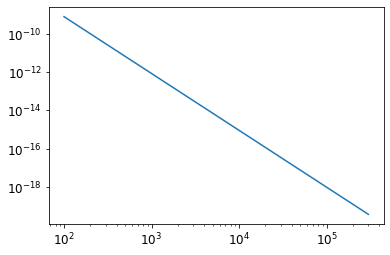

In [14]:
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E), label='dnde_data')
plt.show()

In [15]:
sed2246 = gta.sed('4FGL J0526.3+2246',outfile='sed2246.fits')

2022-05-17 09:08:49 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-05-17 09:09:04 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-17 09:09:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-17 09:09:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-17 09:09:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-17 09:09:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-17 09:09:04 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-17 09:09:04 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
2022-05-17 09:09:15 INFO    GTAnalysis.sed(): Finished SED
2022-05-17 09:09:22 INFO    GTAnalysis.sed(): Execution time: 33.24 s


In [16]:
sed2246

{'name': '4FGL J0526.3+2246',
 'loge_min': array([2.     , 2.16558, 2.33115, 2.49673, 2.66231, 2.82789, 2.99346,
        3.15904, 3.32462, 3.49019, 3.65577, 3.82135, 3.98693, 4.1525 ,
        4.31808, 4.48366, 4.64924, 4.81481, 4.98039, 5.14597, 5.31154]),
 'loge_max': array([2.16558, 2.33115, 2.49673, 2.66231, 2.82789, 2.99346, 3.15904,
        3.32462, 3.49019, 3.65577, 3.82135, 3.98693, 4.1525 , 4.31808,
        4.48366, 4.64924, 4.81481, 4.98039, 5.14597, 5.31154, 5.47712]),
 'loge_ctr': array([2.08279 , 2.248365, 2.41394 , 2.57952 , 2.7451  , 2.910675,
        3.07625 , 3.24183 , 3.407405, 3.57298 , 3.73856 , 3.90414 ,
        4.069715, 4.23529 , 4.40087 , 4.56645 , 4.732025, 4.8976  ,
        5.06318 , 5.228755, 5.39433 ]),
 'loge_ref': array([2.08279 , 2.248365, 2.41394 , 2.57952 , 2.7451  , 2.910675,
        3.07625 , 3.24183 , 3.407405, 3.57298 , 3.73856 , 3.90414 ,
        4.069715, 4.23529 , 4.40087 , 4.56645 , 4.732025, 4.8976  ,
        5.06318 , 5.228755, 5.39433 ]),
 'e_

In [17]:
sed2246_tab = Table.read('Crab_5_bin_6/4fgl_j0526.3+2246_sed.fits')

In [18]:
sed2246_tab

e_min,e_ref,e_max,ref_dnde_e_min,ref_dnde_e_max,ref_dnde,ref_flux,ref_eflux,ref_npred,dnde,dnde_err,dnde_errp,dnde_errn,dnde_ul,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,norm,norm_err,norm_errp,norm_errn,norm_ul,ts,loglike,norm_scan [20],dloglike_scan [20]
MeV,MeV,MeV,ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 s),MeV / (cm2 s),,ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),ph / (cm2 MeV s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),MeV / (cm2 s),,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100.0,121.00128989595494,146.4131215648491,1e-11,4.664874883106917e-12,6.8299889334514334e-12,3.1700149844740216e-10,3.812620396979536e-08,20.42459036326681,5.660658466594054e-10,8.908119184473512e-11,8.946482702624088e-11,8.869755666322934e-11,7.11560920414349e-10,8.287946762065285e-06,1.3042655370704862e-06,1.3098824595171218e-06,1.2986486146238505e-06,1.0418185554142212e-05,82.87946762065282,13.042655370704862,13.09882459517122,12.986486146238505,104.18185554142212,40.43144937074976,-204075.67958425984,0.0 .. 113.29166801947981,-20.21572468537488 .. -2.702390178834321
146.4131215648491,177.1597260319376,214.36308571434947,4.664874883106917e-12,2.176205983185727e-12,3.1861777463647742e-12,2.1650093118770305e-10,3.812390138470258e-08,23.723395857781398,1.9302341119784633e-10,3.1163885232751724e-11,3.1375989790759085e-11,3.095178067474437e-11,2.442932384991731e-10,6.0581494996025815e-06,9.78096255562256e-07,9.84753277702636e-07,9.714392334218762e-07,7.667282177772291e-06,60.58149499602582,9.780962555622558,9.847532777026357,9.714392334218761,76.6728217777229,38.6664499421604,-202400.500729374,0.0 .. 83.5275919720205,-19.3332249710802 .. -2.7016138139006216
214.36308571434947,259.38209877513435,313.8556852771122,2.176205983185727e-12,1.015172863143009e-12,1.4863462782069315e-12,1.4788063783977437e-10,3.812620396979538e-08,24.246403281827618,4.581933318853736e-11,1.0908525946650935e-11,1.0968563085837897e-11,1.0848488807463975e-11,6.386391456794474e-11,3.082682269962822e-06,7.339155152869588e-07,7.379547583669352e-07,7.298762722069825e-07,4.2967049808196515e-06,30.826822699628217,7.339155152869588,7.3795475836693525,7.298762722069824,42.96704980819651,17.81708509643795,-189075.54180876786,0.0 .. 48.09563077445844,-8.908542548218975 .. -2.7008904153772164
313.8556852771122,379.7694275970945,459.5259060229689,1.015172863143009e-12,4.735654391287548e-13,6.933619420806958e-13,1.0100231199174015e-10,3.812620396979548e-08,22.683864151477792,1.0055987804143326e-11,3.928512035888228e-12,3.934342696646234e-12,3.922681375130221e-12,1.6586166114470796e-11,1.450323012244733e-06,5.665889339266641e-07,5.674298599141086e-07,5.657480079392195e-07,2.392136791456668e-06,14.503230122447327,5.66588933926664,5.674298599141085,5.657480079392194,23.921367914566677,6.680611115065403,-167780.56310878263,0.0 .. 27.830638781639063,-3.3403055575327016 .. -2.7001291364140343
459.5259060229689,556.0322736938655,672.8062234073838,4.735654391287548e-13,2.2091235224992251e-13,3.2344467085144715e-13,6.898446731565929e-11,3.8126203969795386e-08,20.131608989356636,1.2317249312348308e-12,1.3917763832559104e-12,1.3917763832559104e-12,nan,3.5147836682154474e-12,3.8081472419761783e-07,4.3029813401845504e-07,4.3029813401845504e-07,nan,1.0866723074963665e-06,3.8081472419761777,4.302981340184549,4.302981340184549,nan,10.866723074963662,0.8080032058060169,-140024.82816000393,0.0 .. 13.80410730258349,-0.40400160290300846 .. -2.7060852880531456
672.8062234073838,814.0948361560708,985.0539118076568,2.2091235224992251e-13,1.0305759420619742e-13,1.5088636635995005e-13,4.7113977329687413e-11,3.8123901384702416e-08,16.917580487670378,9.610464249081983e-13,4.846925720296675e-13,4.899800943528661e-13,4.794050497064688e-13,1.776518997097509e-12,6.369

In [19]:
aa = np.array(sed2246['dnde_ul95'])
bb = np.array(0.2*sed2246['dnde_ul95'])
(aa-bb)*(100/bb)

array([400., 400., 400., 400., 400., 400., 400., 400., 400., 400., 400.,
       400., 400., 400., 400., 400., 400., 400., 400., 400., 400.])

In [20]:
aa

array([6.94551458e-10, 2.40613500e-10, 6.28249350e-11, 1.63321475e-11,
       3.46968508e-12, 1.77348561e-12, 6.12181414e-13, 2.00020394e-13,
       1.25997910e-13, 4.07311568e-14, 1.06526588e-14, 1.08232293e-14,
       4.28506853e-15, 2.38647406e-15, 3.57885747e-16, 9.03625776e-16,
       1.36984735e-16, 1.09706624e-16, 1.51879086e-16, 6.97931040e-17,
       2.66721021e-17])

In [21]:
bb

array([1.38910292e-10, 4.81226999e-11, 1.25649870e-11, 3.26642950e-12,
       6.93937015e-13, 3.54697122e-13, 1.22436283e-13, 4.00040788e-14,
       2.51995819e-14, 8.14623136e-15, 2.13053175e-15, 2.16464587e-15,
       8.57013706e-16, 4.77294813e-16, 7.15771495e-17, 1.80725155e-16,
       2.73969471e-17, 2.19413248e-17, 3.03758172e-17, 1.39586208e-17,
       5.33442042e-18])

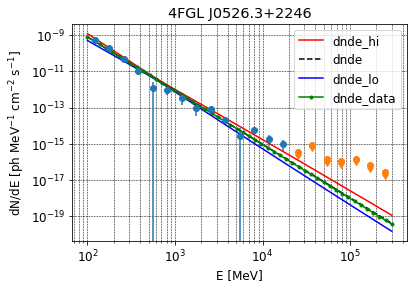

In [22]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.errorbar(sed2246['e_ctr'][:-7],
             1*sed2246['dnde'][:-7], 
             yerr=sed2246['dnde_err'][:-7], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-7:]),
         sed2246['dnde_ul95'][-7:], yerr=0.2*sed2246['dnde_ul95'][-7:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [23]:
E

array([1.00000000e+02, 1.17750194e+02, 1.38651083e+02, 1.63261919e+02,
       1.92241227e+02, 2.26364419e+02, 2.66544543e+02, 3.13856718e+02,
       3.69566895e+02, 4.35165737e+02, 5.12408501e+02, 6.03362006e+02,
       7.10459935e+02, 8.36567954e+02, 9.85060392e+02, 1.15991053e+03,
       1.36579690e+03, 1.60822850e+03, 1.89369219e+03, 2.22982623e+03,
       2.62562472e+03, 3.09167821e+03, 3.64045711e+03, 4.28664532e+03,
       5.04753319e+03, 5.94348015e+03, 6.99845942e+03, 8.24069957e+03,
       9.70343977e+03, 1.14258192e+04, 1.34539243e+04, 1.58420220e+04,
       1.86540117e+04, 2.19651350e+04, 2.58639892e+04, 3.04548975e+04,
       3.58607011e+04, 4.22260452e+04, 4.97212503e+04, 5.85468688e+04,
       6.89390519e+04, 8.11758676e+04, 9.55847418e+04, 1.12551219e+05,
       1.32529279e+05, 1.56053484e+05, 1.83753281e+05, 2.16369845e+05,
       2.54775913e+05, 2.99999133e+05])

In [24]:
sed2246['e_ctr']

array([1.21001290e+02, 1.77159726e+02, 2.59382099e+02, 3.79769428e+02,
       5.56032274e+02, 8.14094836e+02, 1.19192794e+03, 1.74513890e+03,
       2.55508293e+03, 3.74093360e+03, 5.47721766e+03, 8.01936536e+03,
       1.17412680e+04, 1.71905590e+04, 2.51692341e+04, 3.68510613e+04,
       5.39541680e+04, 7.89950721e+04, 1.15659151e+05, 1.69338224e+05,
       2.47930525e+05])

In [25]:
dnde

array([7.66533851e-10, 4.73197141e-10, 2.92114346e-10, 1.80328205e-10,
       1.11320316e-10, 6.87203251e-11, 4.24224727e-11, 2.61882665e-11,
       1.61665565e-11, 9.97994847e-12, 6.16082783e-12, 3.80320597e-12,
       2.34779741e-12, 1.44934372e-12, 8.94709742e-13, 5.52322759e-13,
       3.40960220e-13, 2.10481769e-13, 1.29934733e-13, 8.02113883e-14,
       4.95161428e-14, 3.05673352e-14, 1.88698459e-14, 1.16487447e-14,
       7.19101012e-15, 4.43915872e-15, 2.74038415e-15, 1.69169560e-15,
       1.04431855e-15, 6.44679361e-16, 3.97973853e-16, 2.45677460e-16,
       1.51661758e-16, 9.36239285e-17, 5.77959802e-17, 3.56786495e-17,
       2.20251655e-17, 1.35965885e-17, 8.39345424e-18, 5.18145225e-18,
       3.19861724e-18, 1.97457233e-18, 1.21894419e-18, 7.52479364e-19,
       4.64521016e-19, 2.86758395e-19, 1.77021866e-19, 1.09279245e-19,
       6.74603300e-20, 4.16446517e-20])

In [26]:
sed2246['dnde'][:-7]

array([5.49219115e-10, 1.89357675e-10, 4.47660647e-11, 9.80220437e-12,
       1.18831001e-12, 9.58049700e-13, 3.17268730e-13, 9.44412807e-14,
       7.81489138e-14, 2.14570564e-14, 2.61775910e-15, 5.88588347e-15,
       1.92533086e-15, 1.01604343e-15])

In [27]:
sed2246['dnde_ul95'][-7:]

array([3.57885747e-16, 9.03625776e-16, 1.36984735e-16, 1.09706624e-16,
       1.51879086e-16, 6.97931040e-17, 2.66721021e-17])

In [28]:
0.99*sed2246['dnde_ul95'][-7:]

array([3.54306890e-16, 8.94589518e-16, 1.35614888e-16, 1.08609558e-16,
       1.50360295e-16, 6.90951730e-17, 2.64053811e-17])

In [29]:
E

array([1.00000000e+02, 1.17750194e+02, 1.38651083e+02, 1.63261919e+02,
       1.92241227e+02, 2.26364419e+02, 2.66544543e+02, 3.13856718e+02,
       3.69566895e+02, 4.35165737e+02, 5.12408501e+02, 6.03362006e+02,
       7.10459935e+02, 8.36567954e+02, 9.85060392e+02, 1.15991053e+03,
       1.36579690e+03, 1.60822850e+03, 1.89369219e+03, 2.22982623e+03,
       2.62562472e+03, 3.09167821e+03, 3.64045711e+03, 4.28664532e+03,
       5.04753319e+03, 5.94348015e+03, 6.99845942e+03, 8.24069957e+03,
       9.70343977e+03, 1.14258192e+04, 1.34539243e+04, 1.58420220e+04,
       1.86540117e+04, 2.19651350e+04, 2.58639892e+04, 3.04548975e+04,
       3.58607011e+04, 4.22260452e+04, 4.97212503e+04, 5.85468688e+04,
       6.89390519e+04, 8.11758676e+04, 9.55847418e+04, 1.12551219e+05,
       1.32529279e+05, 1.56053484e+05, 1.83753281e+05, 2.16369845e+05,
       2.54775913e+05, 2.99999133e+05])

In [30]:
dnde

array([7.66533851e-10, 4.73197141e-10, 2.92114346e-10, 1.80328205e-10,
       1.11320316e-10, 6.87203251e-11, 4.24224727e-11, 2.61882665e-11,
       1.61665565e-11, 9.97994847e-12, 6.16082783e-12, 3.80320597e-12,
       2.34779741e-12, 1.44934372e-12, 8.94709742e-13, 5.52322759e-13,
       3.40960220e-13, 2.10481769e-13, 1.29934733e-13, 8.02113883e-14,
       4.95161428e-14, 3.05673352e-14, 1.88698459e-14, 1.16487447e-14,
       7.19101012e-15, 4.43915872e-15, 2.74038415e-15, 1.69169560e-15,
       1.04431855e-15, 6.44679361e-16, 3.97973853e-16, 2.45677460e-16,
       1.51661758e-16, 9.36239285e-17, 5.77959802e-17, 3.56786495e-17,
       2.20251655e-17, 1.35965885e-17, 8.39345424e-18, 5.18145225e-18,
       3.19861724e-18, 1.97457233e-18, 1.21894419e-18, 7.52479364e-19,
       4.64521016e-19, 2.86758395e-19, 1.77021866e-19, 1.09279245e-19,
       6.74603300e-20, 4.16446517e-20])

In [31]:
powerlaw(Prefactor2246,Index2246,Scale2246,E)

array([7.90838472e-10, 4.86778894e-10, 2.99623374e-10, 1.84424936e-10,
       1.13517702e-10, 6.98727029e-11, 4.30082226e-11, 2.64725298e-11,
       1.62944384e-11, 1.00295939e-11, 6.17344095e-12, 3.79989197e-12,
       2.33891910e-12, 1.43965739e-12, 8.86141555e-13, 5.45440088e-13,
       3.35730660e-13, 2.06649784e-13, 1.27197597e-13, 7.82929862e-14,
       4.81910966e-14, 2.96627055e-14, 1.82580634e-14, 1.12382493e-14,
       6.91739559e-15, 4.25781281e-15, 2.62077969e-15, 1.61314894e-15,
       9.92929507e-16, 6.11170478e-16, 3.76189196e-16, 2.31552924e-16,
       1.42526041e-16, 8.77279886e-17, 5.39985531e-17, 3.32373258e-17,
       2.04583227e-17, 1.25925585e-17, 7.75100340e-18, 4.77091719e-18,
       2.93660700e-18, 1.80754776e-18, 1.11258636e-18, 6.84821966e-19,
       4.21523346e-19, 2.59457115e-19, 1.59701699e-19, 9.82999929e-20,
       6.05058599e-20, 3.72427197e-20])

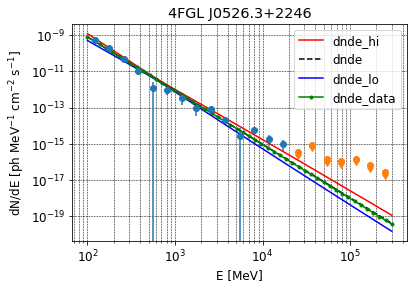

In [32]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.errorbar(sed2246['e_ctr'][:-7],
             1*sed2246['dnde'][:-7], 
             yerr=sed2246['dnde_err'][:-7], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-7:]),
         sed2246['dnde_ul95'][-7:], yerr=0.2*sed2246['dnde_ul95'][-7:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [33]:
xerror2246 = np.append(sed2246['e_ctr'][:-7],sed2246['e_ctr'][-7:])
yerror2246 = np.append(sed2246['dnde'][:-7],sed2246['dnde_ul95'][-7:])

In [34]:
xerror2246

array([1.21001290e+02, 1.77159726e+02, 2.59382099e+02, 3.79769428e+02,
       5.56032274e+02, 8.14094836e+02, 1.19192794e+03, 1.74513890e+03,
       2.55508293e+03, 3.74093360e+03, 5.47721766e+03, 8.01936536e+03,
       1.17412680e+04, 1.71905590e+04, 2.51692341e+04, 3.68510613e+04,
       5.39541680e+04, 7.89950721e+04, 1.15659151e+05, 1.69338224e+05,
       2.47930525e+05])

In [35]:
len(yerror2246)

21

No handles with labels found to put in legend.


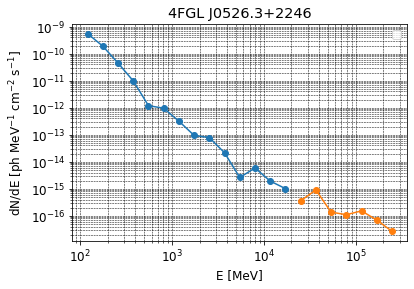

In [36]:
plt.loglog(sed2246['e_ctr'][:-7],sed2246['dnde'][:-7],'o-')
plt.loglog(np.array(sed2246['e_ctr'][-7:]),sed2246['dnde_ul95'][-7:],'o-')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()


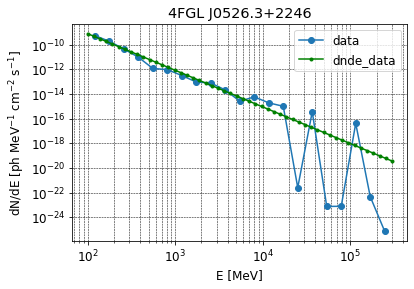

In [37]:
plt.loglog(sed2246['e_ctr'],sed2246['dnde'],"o-", label='data')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()


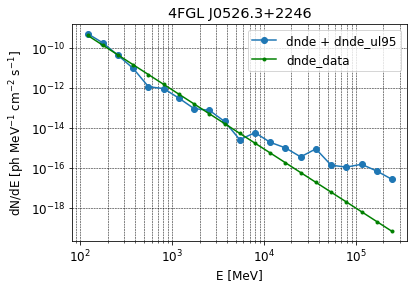

In [38]:
xerror2246 = np.append(sed2246['e_ctr'][:-7],sed2246['e_ctr'][-7:])
yerror2246 = np.append(sed2246['dnde'][:-7],sed2246['dnde_ul95'][-7:])
plt.loglog(xerror2246, yerror2246,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2246, powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()

In [39]:
len(xerror2246)

21

In [40]:
#len(Chi_Square)

In [41]:
error2246 = np.append(sed2246['dnde_err'][:-7],0.2*sed2246['dnde_ul95'][-7:])

In [42]:
sed2246['dnde_err']

array([8.90817623e-11, 3.11630430e-11, 1.09090146e-11, 3.92880641e-12,
       1.39191653e-12, 4.84696424e-13, 1.74618814e-13, 6.03066718e-14,
       2.69101039e-14, 1.03795027e-14, 4.54217700e-15, 2.49535163e-15,
       1.12249468e-15, 6.35538042e-16, 1.33129395e-16, 2.44016475e-16,
       5.07575715e-17, 4.15948212e-17, 4.21061316e-17, 3.24146261e-17,
       9.85834531e-18])

In [43]:
error2246

array([8.90817623e-11, 3.11630430e-11, 1.09090146e-11, 3.92880641e-12,
       1.39191653e-12, 4.84696424e-13, 1.74618814e-13, 6.03066718e-14,
       2.69101039e-14, 1.03795027e-14, 4.54217700e-15, 2.49535163e-15,
       1.12249468e-15, 6.35538042e-16, 7.15771495e-17, 1.80725155e-16,
       2.73969471e-17, 2.19413248e-17, 3.03758172e-17, 1.39586208e-17,
       5.33442042e-18])

In [44]:
yerror2246

array([5.49219115e-10, 1.89357675e-10, 4.47660647e-11, 9.80220437e-12,
       1.18831001e-12, 9.58049700e-13, 3.17268730e-13, 9.44412807e-14,
       7.81489138e-14, 2.14570564e-14, 2.61775910e-15, 5.88588347e-15,
       1.92533086e-15, 1.01604343e-15, 3.57885747e-16, 9.03625776e-16,
       1.36984735e-16, 1.09706624e-16, 1.51879086e-16, 6.97931040e-17,
       2.66721021e-17])

In [45]:
powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)

array([4.48953631e-10, 1.44691740e-10, 4.66322090e-11, 1.50284222e-11,
       4.84329351e-12, 1.56092860e-12, 5.03066373e-13, 1.62126008e-13,
       5.22510399e-14, 1.68398101e-14, 5.42705957e-15, 1.74900878e-15,
       5.63682093e-16, 1.81667186e-16, 5.85468978e-17, 1.88682355e-17,
       6.08097949e-18, 1.95981821e-18, 6.31601552e-19, 2.03556717e-19,
       6.56036025e-20])

In [46]:
sed2246['dnde']

array([5.49219115e-10, 1.89357675e-10, 4.47660647e-11, 9.80220437e-12,
       1.18831001e-12, 9.58049700e-13, 3.17268730e-13, 9.44412807e-14,
       7.81489138e-14, 2.14570564e-14, 2.61775910e-15, 5.88588347e-15,
       1.92533086e-15, 1.01604343e-15, 2.57156515e-22, 3.65714842e-16,
       7.65063716e-24, 7.89866739e-24, 4.14874438e-17, 4.81096089e-23,
       7.36069449e-26])

In [47]:
error2246

array([8.90817623e-11, 3.11630430e-11, 1.09090146e-11, 3.92880641e-12,
       1.39191653e-12, 4.84696424e-13, 1.74618814e-13, 6.03066718e-14,
       2.69101039e-14, 1.03795027e-14, 4.54217700e-15, 2.49535163e-15,
       1.12249468e-15, 6.35538042e-16, 7.15771495e-17, 1.80725155e-16,
       2.73969471e-17, 2.19413248e-17, 3.03758172e-17, 1.39586208e-17,
       5.33442042e-18])

In [48]:
q = yerror2246- powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)

In [49]:
print(q/error2246)

[ 1.12554445  1.43329827 -0.17106442 -1.33023044 -2.625864   -1.24382783
 -1.06401847 -1.12234227  0.96238476  0.44484273 -0.61849207  1.65783236
  1.21305588  1.31286593  4.18204485  4.89559707  4.77804171  4.91067913
  4.97920709  4.98541713  4.98770183]


In [50]:
sed2246['dnde']

array([5.49219115e-10, 1.89357675e-10, 4.47660647e-11, 9.80220437e-12,
       1.18831001e-12, 9.58049700e-13, 3.17268730e-13, 9.44412807e-14,
       7.81489138e-14, 2.14570564e-14, 2.61775910e-15, 5.88588347e-15,
       1.92533086e-15, 1.01604343e-15, 2.57156515e-22, 3.65714842e-16,
       7.65063716e-24, 7.89866739e-24, 4.14874438e-17, 4.81096089e-23,
       7.36069449e-26])

In [51]:
q = sed2246['dnde'] - powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)

In [52]:
print(q/sed2246['dnde_err'])

[ 1.12554445  1.43329827 -0.17106442 -1.33023044 -2.625864   -1.24382783
 -1.06401847 -1.12234227  0.96238476  0.44484273 -0.61849207  1.65783236
  1.21305588  1.31286593 -0.43977245  1.42140651 -0.11980423 -0.04711669
  0.97030624 -0.0062783  -0.00665462]


In [53]:
sed2246['dnde_err']

array([8.90817623e-11, 3.11630430e-11, 1.09090146e-11, 3.92880641e-12,
       1.39191653e-12, 4.84696424e-13, 1.74618814e-13, 6.03066718e-14,
       2.69101039e-14, 1.03795027e-14, 4.54217700e-15, 2.49535163e-15,
       1.12249468e-15, 6.35538042e-16, 1.33129395e-16, 2.44016475e-16,
       5.07575715e-17, 4.15948212e-17, 4.21061316e-17, 3.24146261e-17,
       9.85834531e-18])

In [54]:
#dnde+uldnde_95
Chi_Square = ((yerror2246- powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))/error2246)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2246['dnde'] - powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))/sed2246['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [ 1.26685032  2.05434394  0.02926304  1.76951302  6.89516174  1.54710767
  1.13213531  1.25965218  0.92618443  0.19788506  0.38253244  2.74840815
  1.47150457  1.72361694 17.48949915 23.96687068 22.82968259 24.11476952
 24.79250327 24.85438399 24.87716956]
sum_Chi_Square = 186.3290375423701
reduced_Chi_Square_dnde+uldnde_95 = 10.351613196798338
Chi_Square_dnde_data = [1.26685032e+00 2.05434394e+00 2.92630368e-02 1.76951302e+00
 6.89516174e+00 1.54710767e+00 1.13213531e+00 1.25965218e+00
 9.26184427e-01 1.97885055e-01 3.82532443e-01 2.74840815e+00
 1.47150457e+00 1.72361694e+00 1.93399812e-01 2.02039647e+00
 1.43530539e-02 2.21998251e-03 9.41494204e-01 3.94169968e-05
 4.42839498e-05]
sum_Chi_Square_dnde_data = 26.576105994438105
reduced_Chi_Square_dnde_data = 1.4764503330243393


In [55]:
yerror2246

array([5.49219115e-10, 1.89357675e-10, 4.47660647e-11, 9.80220437e-12,
       1.18831001e-12, 9.58049700e-13, 3.17268730e-13, 9.44412807e-14,
       7.81489138e-14, 2.14570564e-14, 2.61775910e-15, 5.88588347e-15,
       1.92533086e-15, 1.01604343e-15, 3.57885747e-16, 9.03625776e-16,
       1.36984735e-16, 1.09706624e-16, 1.51879086e-16, 6.97931040e-17,
       2.66721021e-17])

In [56]:
(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))

array([4.48953631e-10, 1.44691740e-10, 4.66322090e-11, 1.50284222e-11,
       4.84329351e-12, 1.56092860e-12, 5.03066373e-13, 1.62126008e-13,
       5.22510399e-14, 1.68398101e-14, 5.42705957e-15, 1.74900878e-15,
       5.63682093e-16, 1.81667186e-16, 5.85468978e-17, 1.88682355e-17,
       6.08097949e-18, 1.95981821e-18, 6.31601552e-19, 2.03556717e-19,
       6.56036025e-20])

In [57]:
(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))*100/(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))

array([ 2.23331490e+01,  3.08697205e+01, -4.00183548e+00, -3.47755592e+01,
       -7.54648359e+01, -3.86230927e+01, -3.69330278e+01, -4.17482229e+01,
        4.95643224e+01,  2.74186366e+01, -5.17646882e+01,  2.36526812e+02,
        2.41563247e+02,  4.59288361e+02,  5.11280462e+02,  4.68913768e+03,
        2.15267550e+03,  5.49779594e+03,  2.39466613e+04,  3.41868096e+04,
        4.05564596e+04])

In [58]:
(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))**2 /((powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))

array([2.23924399e-11, 1.37882495e-11, 7.46800239e-14, 1.81744649e-12,
       2.75822730e-12, 2.32850477e-13, 6.86206953e-14, 2.82571707e-14,
       1.28361057e-14, 1.26598599e-15, 1.45422563e-15, 9.78481785e-15,
       3.28924298e-15, 3.83219296e-15, 1.53046105e-15, 4.14874992e-14,
       2.81793308e-15, 5.92369952e-15, 3.62187230e-14, 2.37904460e-14,
       1.07906538e-14])

In [59]:
((6.56036025e-20-2.66717726e-17)**2)/6.56036025e-20

1.0790386529817936e-14

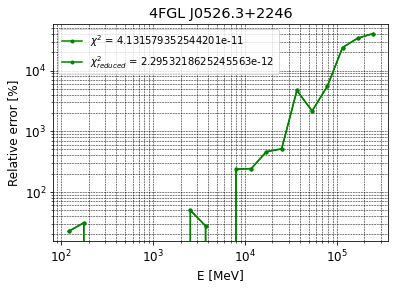

In [60]:
chi2246 = chisquare(yerror2246, f_exp= powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246))
rechi2246 = chi2246[0]/(21-3)

plt.plot(xerror2246,(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))*100/(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(xerror2246,(yerror2246-(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)))*100/(powerlaw(Prefactor2246,Index2246,Scale2246,xerror2246)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [61]:
chi2246

Power_divergenceResult(statistic=4.131579352544201e-11, pvalue=1.0)

In [62]:
rechi2246

2.2953218625245563e-12

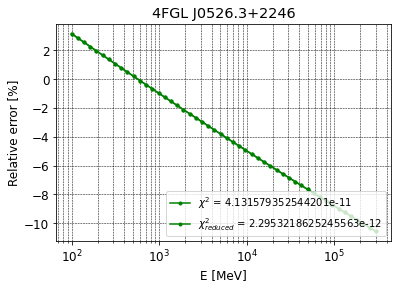

In [63]:
#chi2246 = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))
#rechi2246 = chi2246[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower right',fontsize=10)
plt.show()
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

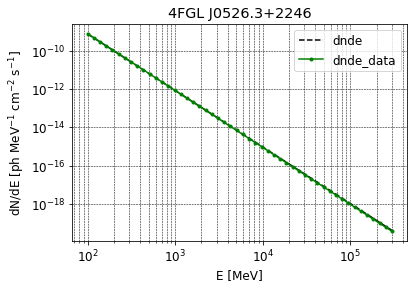

In [64]:
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [65]:
Prefactor2246= 1.04*1e-14
Index2246= -2.97
Scale2246= 4.4e+03

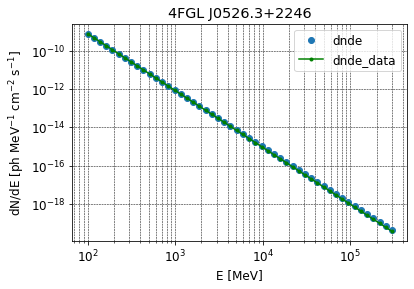

In [66]:
plt.loglog(E, dnde, 'o',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [67]:
chi2246 = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))

In [68]:
chi2246

Power_divergenceResult(statistic=1.4795980831257978e-12, pvalue=1.0)

In [69]:
len(E)

50

In [70]:
rechi2246 = chi2246[0]/(50-3)

In [71]:
rechi2246

3.148081027927229e-14

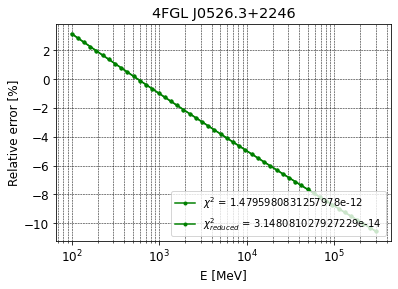

In [72]:
chi2246 = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))
rechi2246 = chi2246[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(E,((powerlaw(Prefactor2246,Index2246,Scale2246,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower right',fontsize=10)
plt.show()
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [73]:
sed2246['dnde'][:-3]*1e-6

array([5.49219115e-16, 1.89357675e-16, 4.47660647e-17, 9.80220437e-18,
       1.18831001e-18, 9.58049700e-19, 3.17268730e-19, 9.44412807e-20,
       7.81489138e-20, 2.14570564e-20, 2.61775910e-21, 5.88588347e-21,
       1.92533086e-21, 1.01604343e-21, 2.57156515e-28, 3.65714842e-22,
       7.65063716e-30, 7.89866739e-30])

In [74]:
sed2246['dnde_err'][:-3]*1e-6

array([8.90817623e-17, 3.11630430e-17, 1.09090146e-17, 3.92880641e-18,
       1.39191653e-18, 4.84696424e-19, 1.74618814e-19, 6.03066718e-20,
       2.69101039e-20, 1.03795027e-20, 4.54217700e-21, 2.49535163e-21,
       1.12249468e-21, 6.35538042e-22, 1.33129395e-22, 2.44016475e-22,
       5.07575715e-23, 4.15948212e-23])

In [75]:
len(sed2246['dnde_err']*1e-6)

21

In [76]:
1*sed2246['dnde_ul95'][-3:]*1e-6

array([1.51879086e-22, 6.97931040e-23, 2.66721021e-23])

In [77]:
0.99*sed2246['dnde_ul95'][-3:]*1e-6

array([1.50360295e-22, 6.90951730e-23, 2.64053811e-23])

In [78]:
sed2246['dnde_err']*1e-6

array([8.90817623e-17, 3.11630430e-17, 1.09090146e-17, 3.92880641e-18,
       1.39191653e-18, 4.84696424e-19, 1.74618814e-19, 6.03066718e-20,
       2.69101039e-20, 1.03795027e-20, 4.54217700e-21, 2.49535163e-21,
       1.12249468e-21, 6.35538042e-22, 1.33129395e-22, 2.44016475e-22,
       5.07575715e-23, 4.15948212e-23, 4.21061316e-23, 3.24146261e-23,
       9.85834531e-24])

In [79]:
len(sed2246['dnde'])

21

In [80]:
sed2246['dnde']*1e-6

array([5.49219115e-16, 1.89357675e-16, 4.47660647e-17, 9.80220437e-18,
       1.18831001e-18, 9.58049700e-19, 3.17268730e-19, 9.44412807e-20,
       7.81489138e-20, 2.14570564e-20, 2.61775910e-21, 5.88588347e-21,
       1.92533086e-21, 1.01604343e-21, 2.57156515e-28, 3.65714842e-22,
       7.65063716e-30, 7.89866739e-30, 4.14874438e-23, 4.81096089e-29,
       7.36069449e-32])

In [81]:
len(sed2246['e_ctr'])

21

In [82]:
src = gta.roi['4FGL J0526.3+2246']

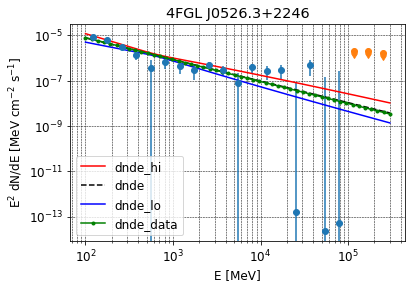

In [83]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*powerlaw(Prefactor2246,Index2246,Scale2246,E),'g.-', label='dnde_data')
plt.errorbar(sed2246['e_ctr'][:-3],
             1*sed2246['e2dnde'][:-3], 
             yerr=sed2246['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-3:]),
         sed2246['e2dnde_ul95'][-3:], yerr=0.2*sed2246['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower left')
plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit2.png")
plt.show()

4FGL J0534.5+2200

In [84]:
Prefactor2200=1.24*1e-10
Index12200= -1.9
Scale2200= 1.46e+03
Expfactor2200= 0.5*0.01
Index22200= 0.667

In [235]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


In [86]:
PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E)

array([1.81483559e-08, 1.31405964e-08, 9.50105098e-09, 6.85859988e-09,
       4.94227343e-09, 3.55432062e-09, 2.55050259e-09, 1.82567579e-09,
       1.30324754e-09, 9.27465964e-10, 6.57784242e-10, 4.64742413e-10,
       3.26959346e-10, 2.28936526e-10, 1.59455350e-10, 1.10408180e-10,
       7.59462907e-11, 5.18592338e-11, 3.51231136e-11, 2.35720979e-11,
       1.56597785e-11, 1.02859982e-11, 6.67134594e-12, 4.26632639e-12,
       2.68573320e-12, 1.66131957e-12, 1.00773835e-12, 5.98092615e-13,
       3.46436999e-13, 1.95298442e-13, 1.06815779e-13, 5.64834742e-14,
       2.87653590e-14, 1.40475119e-14, 6.54654907e-15, 2.89580620e-15,
       1.20854239e-15, 4.72694448e-16, 1.71981314e-16, 5.77226889e-17,
       1.77068869e-17, 4.91325788e-18, 1.21902303e-18, 2.66977673e-19,
       5.08768443e-20, 8.30215354e-21, 1.13953814e-21, 1.28968407e-22,
       1.17708246e-23, 8.45164818e-25])

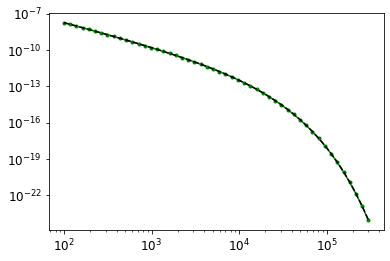

In [87]:
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.show()

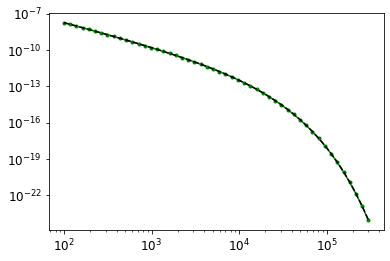

In [88]:
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.show()

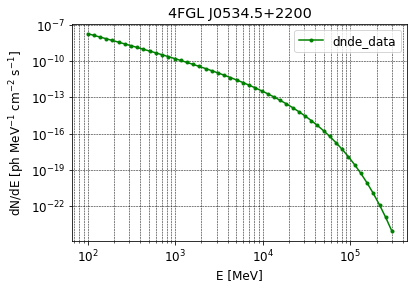

In [89]:
#plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
#plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
#plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [90]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-05-17 09:09:30 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-05-17 09:09:43 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-17 09:09:43 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-17 09:09:43 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-17 09:09:43 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-17 09:09:43 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-17 09:09:43 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-17 09:09:43 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']


Drm_Cache::update Measured counts < 0 4FGL J0534.5+2200 20 -3.10609e-15 6.32314e-16
4.50816e-06 5.55181e-06 5.70879e-06 5.1831e-06 4.2988e-06 3.27197e-06 2.32664e-06 1.52833e-06 9.11076e-07 4.95299e-07 2.47165e-07 1.14116e-07 4.68687e-08 1.63817e-08 4.71891e-09 1.09711e-09 1.83274e-10 2.01734e-11 1.32471e-12 4.45526e-14 6.32314e-16 


/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-05-17 09:09:56 INFO    GTAnalysis.sed(): Finished SED
2022-05-17 09:10:03 INFO    GTAnalysis.sed(): Execution time: 32.59 s


In [91]:
src2200 = gta.roi['4FGL J0534.5+2200']

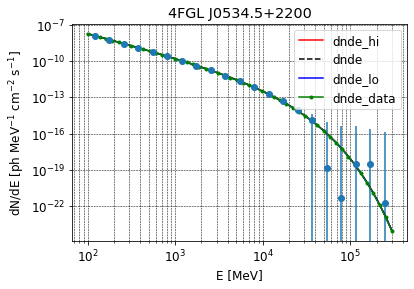

In [92]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.errorbar(sed2200['e_ctr'],
             1*sed2200['dnde'], 
             yerr=sed2200['dnde_err'], fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

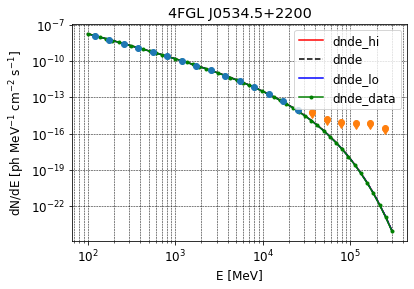

In [93]:
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E),'g.-', label='dnde_data')
plt.errorbar(sed2200['e_ctr'][:-6],
             1*sed2200['dnde'][:-6], 
             yerr=sed2200['dnde_err'][:-6], fmt ='o')
plt.errorbar(np.array(sed2200['e_ctr'][-6:]),
         sed2200['dnde_ul95'][-6:], yerr=0.2*sed2200['dnde_ul95'][-6:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [94]:
len(E)

50

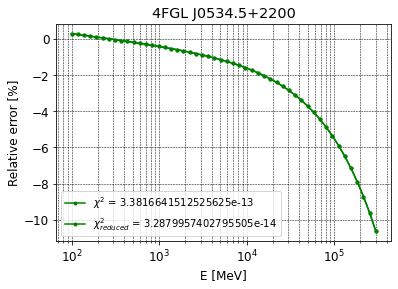

In [95]:
chi2200 = chisquare(dnde, f_exp=(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E)))
rechi2200 = chi2246[0]/(50-5)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2200[0]))
plt.plot(E,(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2200))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

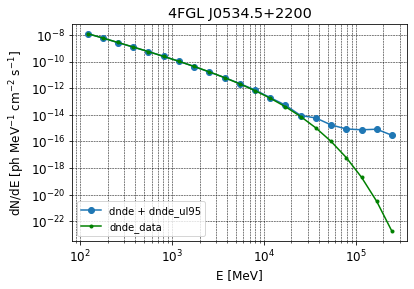

In [96]:
xerror2200 = np.append(sed2200['e_ctr'][:-6],sed2200['e_ctr'][-6:])
yerror2200 = np.append(sed2200['dnde'][:-6],sed2200['dnde_ul95'][-6:])
#sedyerror2200 = sed2200['dnde']
plt.loglog(xerror2200, yerror2200,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2200, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [97]:
len(yerror2200)

21

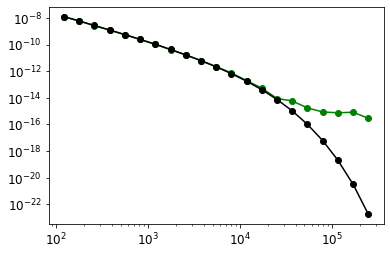

In [98]:
plt.loglog(xerror2200,yerror2200,'go-')
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'ko-')
plt.show()

In [99]:
yerror2200

array([1.23070581e-08, 5.94006228e-09, 2.60674893e-09, 1.21809664e-09,
       5.59066760e-10, 2.44869596e-10, 1.06121745e-10, 4.19494259e-11,
       1.65191255e-11, 6.23569298e-12, 2.20506860e-12, 7.33193225e-13,
       1.95670229e-13, 5.32563640e-14, 8.84548344e-15, 5.79540893e-15,
       1.73391413e-15, 8.68883451e-16, 7.49936923e-16, 8.26521250e-16,
       2.89590497e-16])

In [100]:
PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)

array([1.24504004e-08, 5.82350494e-09, 2.69602955e-09, 1.23169130e-09,
       5.53172176e-10, 2.43031617e-10, 1.03783638e-10, 4.27242792e-11,
       1.67771124e-11, 6.19876034e-12, 2.11720505e-12, 6.53469215e-13,
       1.76998726e-13, 4.05094614e-14, 7.46065710e-15, 1.03831886e-15,
       1.00698005e-16, 6.12909939e-18, 2.04563709e-19, 3.14674323e-21,
       1.78253512e-23])

In [101]:
(sed2200['dnde_err'][:-6])

array([9.03401069e-11, 3.65122042e-11, 1.59807227e-11, 7.53453439e-12,
       3.72017743e-12, 1.85157122e-12, 9.43833081e-13, 4.79765338e-13,
       2.48418602e-13, 1.30998758e-13, 6.88197462e-14, 3.57355805e-14,
       1.80336595e-14, 9.51865138e-15, 4.91368007e-15])

In [102]:
((2.60173095e-09-2.69602955e-09)/1.59833508e-11)**2

34.807659935775085

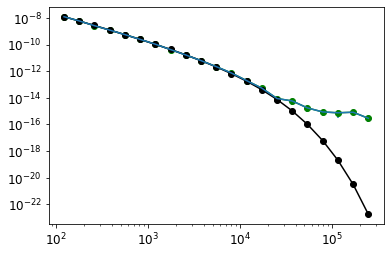

In [103]:
plt.loglog(xerror2200,yerror2200,'go-')
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'ko-')
plt.errorbar(xerror2200,yerror2200,(sed2200['dnde_err']))
plt.show()

In [104]:
Chi_Square = ((yerror2200 - PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/sed2200['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(15-5)
print('Chi_Square =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square =', reduced_Chi_Square)

Chi_Square = [ 2.5176033  10.19067924 31.2119946   3.25554595  2.51060838  0.98537276
  6.13675105  2.60844233  1.07851733  0.07948518  1.63001432  4.97710257
  1.07199022  1.79332288  0.07942859  3.05176913  3.67767596  4.6233171
  2.92312322 10.45701426  3.99370229]
sum_Chi_Square = 98.85346064022063
reduced_Chi_Square = 9.885346064022063


In [105]:
len(xerror2200)

21

In [106]:
xerror2200 = sed2200['e_ctr']
yerror2200 = sed2200['dnde']
Chi_Square = ((yerror2200 - PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/sed2200['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(xerror2200)-5)
print('Chi_Square =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square =', reduced_Chi_Square)

Chi_Square = [2.51760330e+00 1.01906792e+01 3.12119946e+01 3.25554595e+00
 2.51060838e+00 9.85372760e-01 6.13675105e+00 2.60844233e+00
 1.07851733e+00 7.94851771e-02 1.63001432e+00 4.97710257e+00
 1.07199022e+00 1.79332288e+00 7.94285947e-02 6.98277508e-03
 1.39409123e-02 2.33295094e-04 7.13048759e-08 1.31288714e-06
 1.42317285e-12]
sum_Chi_Square = 70.14801706573053
reduced_Chi_Square = 4.384251066608158


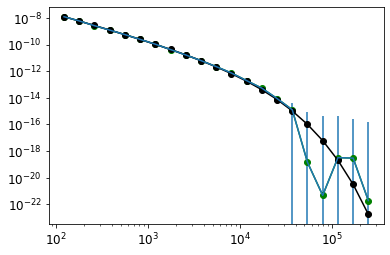

In [107]:
plt.loglog(xerror2200,yerror2200,'go-')
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'ko-')
plt.errorbar(xerror2200,yerror2200,(sed2200['dnde_err']))
plt.show()

In [108]:
(sed2200['dnde_err'][:-6])

array([9.03401069e-11, 3.65122042e-11, 1.59807227e-11, 7.53453439e-12,
       3.72017743e-12, 1.85157122e-12, 9.43833081e-13, 4.79765338e-13,
       2.48418602e-13, 1.30998758e-13, 6.88197462e-14, 3.57355805e-14,
       1.80336595e-14, 9.51865138e-15, 4.91368007e-15])

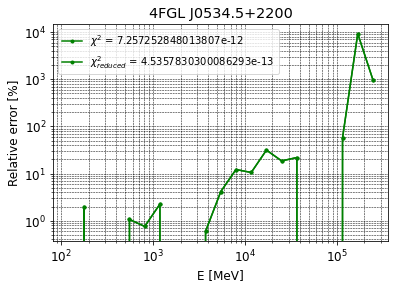

In [109]:
chi2200 = chisquare(yerror2200, f_exp= PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))
rechi2200 = chi2200[0]/(21-5)
plt.plot(xerror2200,(yerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2200[0]))
plt.plot(xerror2200,(yerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2200))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

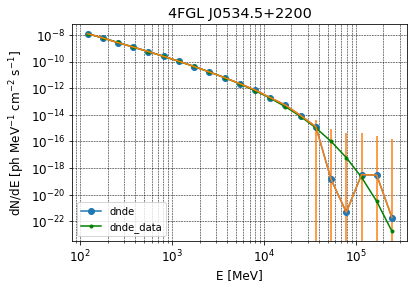

In [110]:

sedyerror2200 = sed2200['dnde']
plt.loglog(xerror2200, sedyerror2200,"o-",label='dnde')
plt.loglog(xerror2200, PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'g.-', label='dnde_data')
plt.errorbar(xerror2200,yerror2200,yerr = sed2200['dnde_err'])
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [111]:
np.append(sed2200['dnde'][:-6],sed2200['dnde_ul95'][-6:])

array([1.23070581e-08, 5.94006228e-09, 2.60674893e-09, 1.21809664e-09,
       5.59066760e-10, 2.44869596e-10, 1.06121745e-10, 4.19494259e-11,
       1.65191255e-11, 6.23569298e-12, 2.20506860e-12, 7.33193225e-13,
       1.95670229e-13, 5.32563640e-14, 8.84548344e-15, 5.79540893e-15,
       1.73391413e-15, 8.68883451e-16, 7.49936923e-16, 8.26521250e-16,
       2.89590497e-16])

In [236]:
#dnde+uldnde_95
error2200 = np.append(sed2200['dnde_err'][:-6],0.2*sed2200['dnde_ul95'][-6:])
Chi_Square = ((yerror2200- PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/error2200)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-5)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2200['dnde'] - PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200))/sed2200['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-5)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [2.51760330e+00 1.01906792e+01 3.12119946e+01 3.25554595e+00
 2.51060838e+00 9.85372760e-01 6.13675105e+00 2.60844233e+00
 1.07851733e+00 7.94851771e-02 1.63001432e+00 4.97710257e+00
 1.07199022e+00 1.79332288e+00 7.94285947e-02 3.85417087e-02
 8.40794551e-02 1.24377894e-03 6.09502026e-07 3.13874761e-06
 8.90885556e-12]
sum_Chi_Square = 70.25072739010217
reduced_Chi_Square_dnde+uldnde_95 = 4.390670461881386
Chi_Square_dnde_data = [2.51760330e+00 1.01906792e+01 3.12119946e+01 3.25554595e+00
 2.51060838e+00 9.85372760e-01 6.13675105e+00 2.60844233e+00
 1.07851733e+00 7.94851771e-02 1.63001432e+00 4.97710257e+00
 1.07199022e+00 1.79332288e+00 7.94285947e-02 6.98277508e-03
 1.39409123e-02 2.33295094e-04 7.13048759e-08 1.31288714e-06
 1.42317285e-12]
sum_Chi_Square_dnde_data = 70.14801706573053
reduced_Chi_Square_dnde_data = 4.384251066608158


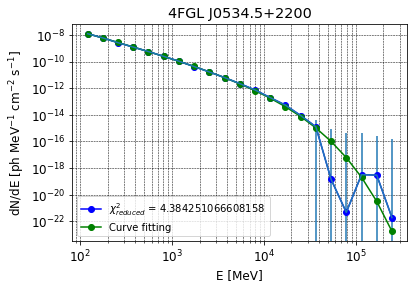

In [113]:
plt.loglog(xerror2200,sed2200['dnde'],'bo-',label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'go-',label='Curve fitting')
plt.errorbar(xerror2200,sed2200['dnde'],(sed2200['dnde_err']))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()


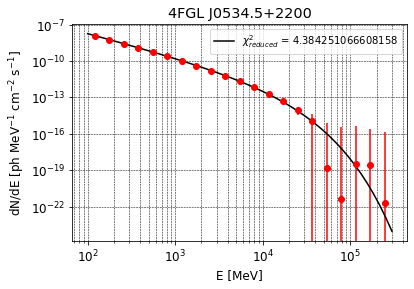

In [237]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'k-' )
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'k.-')
plt.loglog(E, dnde2200, '-',color='black', label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.errorbar(np.array(sed2200['e_ctr']),
             sed2200['dnde'], 
             yerr=sed2200['dnde_err'], fmt ='ro')

#plt.ylim(5e-12,9e-10)
#plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

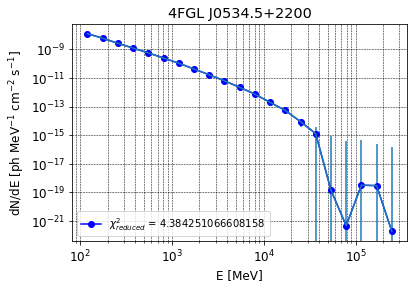

In [114]:
plt.loglog(xerror2200,sed2200['dnde'],'bo-',label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
#plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'go-',label='Curve fitting')
plt.errorbar(xerror2200,sed2200['dnde'],(sed2200['dnde_err']))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()


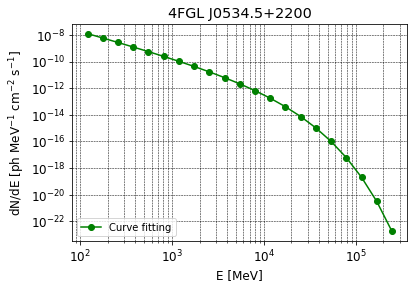

In [115]:
#plt.loglog(xerror2200,sed2200['dnde'],'bo-',label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.loglog(xerror2200,PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200),'go-',label='Curve fitting')
#plt.errorbar(xerror2200,sed2200['dnde'],(sed2200['dnde_err']))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left',fontsize=10)
plt.show()


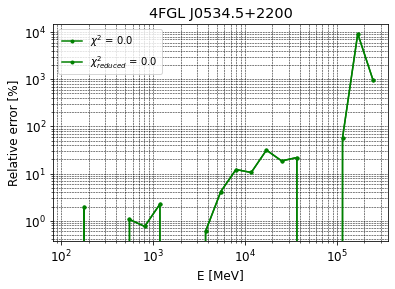

In [116]:
chi2200 = chisquare(yerror2200, f_exp= sedyerror2200)
rechi2200 = chi2200[0]/(21-5)
plt.plot(xerror2200,(sedyerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2200[0]))
plt.plot(xerror2200,(sedyerror2200-(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)))*100/(PLSuperExpCutoff(Prefactor2200,Index12200,Index22200,Expfactor2200,Scale2200,xerror2200)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2200))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [117]:
chi2200

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [118]:
rechi2200

0.0

4FGL J0534.5+2201i

In [231]:
norm=0.769*1e-12
alpha=2.04
beta=0.0181
Eb=1e+04

In [232]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


In [121]:
len(E)

50

In [122]:
a = LogParabola(1,1,1,1,1)

In [123]:
print(a)

1.0


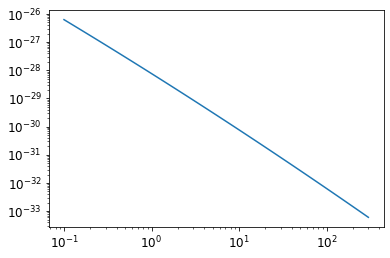

In [124]:
plt.loglog(E/1e3,LogParabola(norm,-alpha,beta,Eb,E)*10**-18)
plt.show()

In [125]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-05-17 09:10:10 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-05-17 09:10:21 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-17 09:10:21 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-17 09:10:21 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-17 09:10:21 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-17 09:10:21 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-17 09:10:21 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-17 09:10:21 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the prog

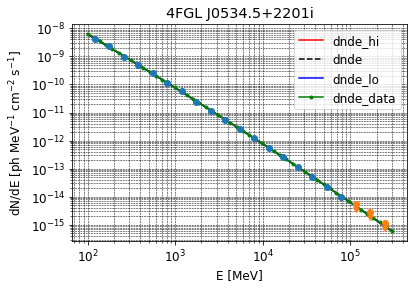

In [126]:
plt.loglog(E, dnde_hi ,'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E,LogParabola(norm,-alpha,beta,Eb,E), 'g.-', label='dnde_data')
plt.errorbar(sed2201i['e_ctr'][:-3],
             1*sed2201i['dnde'][:-3], 
             yerr=sed2201i['dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201i['e_ctr'][-3:]),
         sed2201i['dnde_ul95'][-3:], yerr=0.2*sed2201i['dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

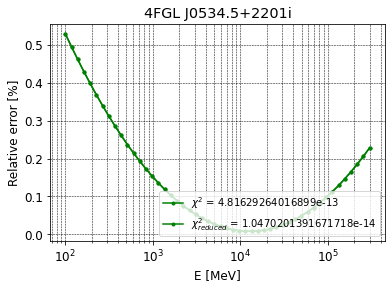

In [127]:
chi2201i = chisquare(dnde, f_exp=(LogParabola(norm,-alpha,beta,Eb,E)))
rechi2201i = chi2201i[0]/(50-4)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(LogParabola(norm,-alpha,beta,Eb,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201i[0]))
plt.plot(E,(LogParabola(norm,-alpha,beta,Eb,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201i))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower right',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [128]:
chi2201i

Power_divergenceResult(statistic=4.81629264016899e-13, pvalue=1.0)

In [129]:
rechi2201i

1.0470201391671718e-14

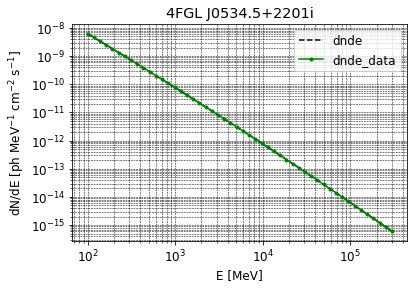

In [130]:

plt.loglog(E, dnde ,'k--',label ='dnde')

plt.loglog(E,LogParabola(norm,-alpha,beta,Eb,E), 'g.-', label='dnde_data')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

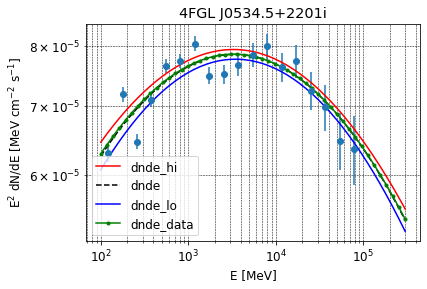

In [131]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*LogParabola(norm,-alpha,beta,Eb,E), 'g.-',label ='dnde_data')
plt.errorbar(sed2201i['e_ctr'][:-3],
             1*sed2201i['e2dnde'][:-3], 
             yerr=sed2201i['e2dnde_err'][:-3], fmt ='o')
#plt.errorbar(np.array(sed2201i['e_ctr'][-3:]),
#         sed2201i['e2dnde_ul95'][-3:], yerr=0.2*sed2201i['e2dnde_ul95'][-3:], 
#             fmt='o', uplims=True)

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left')
plt.show()

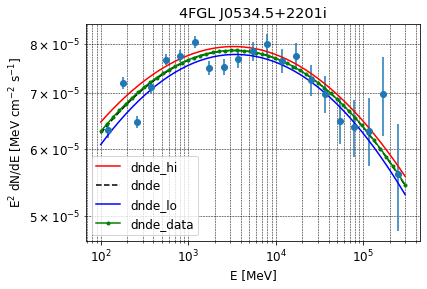

In [132]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*LogParabola(norm,-alpha,beta,Eb,E), 'g.-',label ='dnde_data')
plt.errorbar(sed2201i['e_ctr'],
             1*sed2201i['e2dnde'], 
             yerr=sed2201i['e2dnde_err'], fmt ='o')
#plt.errorbar(np.array(sed2201i['e_ctr'][-3:]),
#         sed2201i['e2dnde_ul95'][-3:], yerr=0.2*sed2201i['e2dnde_ul95'][-3:], 
#             fmt='o', uplims=True)

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left')
plt.show()

In [133]:
a = chisquare(dnde, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E)))

In [134]:
a[0]

3.3679153515089087e-07

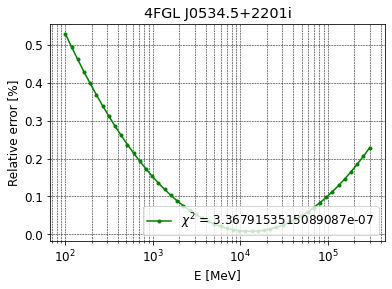

In [135]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((LogParabola(norm,-alpha,beta,Eb,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

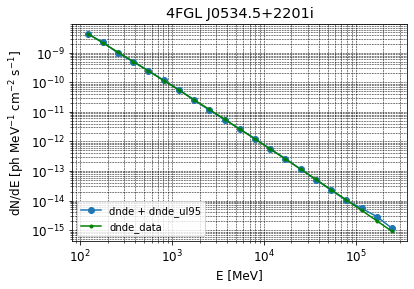

In [136]:
xerror2201i = np.append(sed2201i['e_ctr'][:-3],sed2201i['e_ctr'][-3:])
yerror2201i = np.append(sed2201i['dnde'][:-3],sed2201i['dnde_ul95'][-3:])
sedyerror2201i = sed2201i['dnde']
plt.loglog(xerror2201i, yerror2201i,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2201i, LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [233]:
#dnde+uldnde_95
error2201i = np.append(sed2201i['dnde_err'][:-3],0.2*sed2201i['dnde_ul95'][-3:])
Chi_Square = ((yerror2201i- LogParabola(norm,-alpha,beta,Eb,xerror2201i))/error2201i)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-4)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2201i['dnde'] - LogParabola(norm,-alpha,beta,Eb,xerror2201i))/sed2201i['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-4)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [1.02669030e+00 1.55173753e+01 2.35276447e+01 1.18706750e+00
 4.35649035e+00 1.66289079e+00 6.23862387e+00 4.47307829e+00
 4.22119041e+00 9.78805586e-01 9.77977494e-03 1.17670127e+00
 8.26061118e-05 8.10161855e-01 2.61442557e-02 7.34045508e-02
 7.11316978e-01 1.46998502e-01 5.46855940e-01 2.01557570e+00
 1.09846551e+00]
sum_Chi_Square = 69.80534405953152
reduced_Chi_Square_dnde+uldnde_95 = 4.106196709384207
Chi_Square_dnde_data = [1.02669030e+00 1.55173753e+01 2.35276447e+01 1.18706750e+00
 4.35649035e+00 1.66289079e+00 6.23862387e+00 4.47307829e+00
 4.22119041e+00 9.78805586e-01 9.77977494e-03 1.17670127e+00
 8.26061118e-05 8.10161855e-01 2.61442557e-02 7.34045508e-02
 7.11316978e-01 1.46998502e-01 8.78675662e-03 1.87004125e+00
 6.99008287e-07]
sum_Chi_Square_dnde_data = 68.02327560692122
reduced_Chi_Square_dnde_data = 4.001369153348307


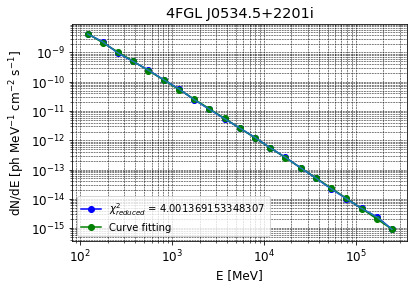

In [138]:
plt.loglog(xerror2201i,sed2201i['dnde'],'bo-',label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.loglog(xerror2201i,LogParabola(norm,-alpha,beta,Eb,xerror2201i),'go-',label='Curve fitting')
plt.errorbar(xerror2201i,sed2201i['dnde'],yerr=sed2201i['dnde_err'])
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left',fontsize=10)
plt.show()


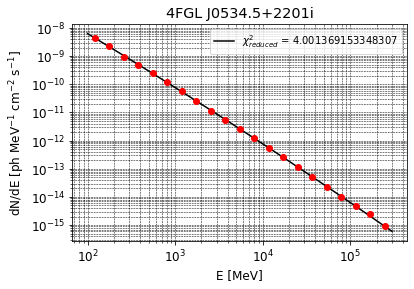

In [234]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'k-' )
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'k.-')
plt.loglog(E, dnde2201i, '-',color='black', label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.errorbar(np.array(sed2201i['e_ctr']),
             sed2201i['dnde'], 
             yerr=sed2201i['dnde_err'], fmt ='ro')

#plt.ylim(5e-12,9e-10)
#plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

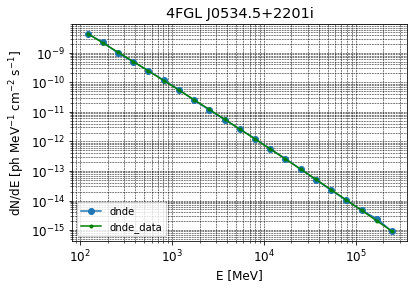

In [139]:
plt.loglog(xerror2201i, sedyerror2201i,"o-",label='dnde')
plt.loglog(xerror2201i, LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [140]:
(yerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/(LogParabola(norm,-alpha,beta,Eb,xerror2201i))

array([-2.06861278e+00,  6.76541390e+00, -7.45213545e+00, -1.65050372e+00,
        3.22914998e+00,  2.08594674e+00,  4.34969808e+00, -3.96530223e+00,
       -4.28540244e+00, -2.31470044e+00,  2.59341910e-01,  3.20630623e+00,
        2.95923895e-02,  3.37249576e+00, -6.92857661e-01, -1.36111398e+00,
       -5.02580721e+00, -2.85922184e+00,  1.73570374e+01,  3.96534811e+01,
        2.65206854e+01])

In [141]:
(yerror2201i-sedyerror2201i)*100/(sedyerror2201i)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 16.32964807, 19.0406581 ,
       26.53614745])

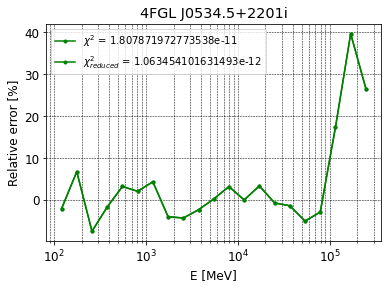

In [142]:
chi2201i = chisquare(yerror2201i, f_exp= LogParabola(norm,-alpha,beta,Eb,xerror2201i))
rechi2201i = chi2201i[0]/(21-4)
plt.plot(xerror2201i,(yerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/(LogParabola(norm,-alpha,beta,Eb,xerror2201i)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201i[0]))
plt.plot(xerror2201i,(yerror2201i-(LogParabola(norm,-alpha,beta,Eb,xerror2201i)))*100/(LogParabola(norm,-alpha,beta,Eb,xerror2201i)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201i))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

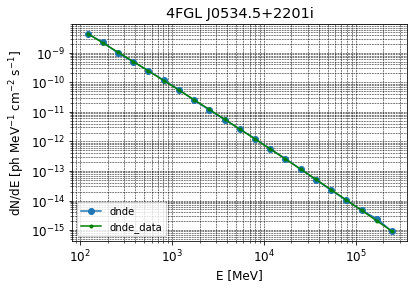

In [143]:
plt.loglog(xerror2201i, sedyerror2201i,"o-",label='dnde')
plt.loglog(xerror2201i, LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='lower left',fontsize=10)
plt.show()

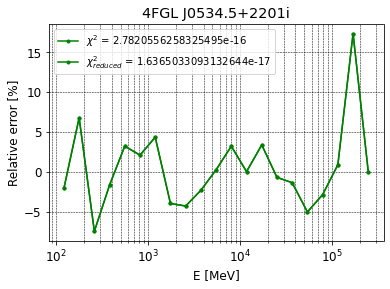

In [144]:
chi2201i = chisquare(yerror2201i, f_exp= sedyerror2201i)
rechi2201i = chi2201i[0]/(21-4)

plt.plot(xerror2201i,(sedyerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201i[0]))
plt.plot(xerror2201i,(sedyerror2201i-LogParabola(norm,-alpha,beta,Eb,xerror2201i))*100/LogParabola(norm,-alpha,beta,Eb,xerror2201i),'g.-',  
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201i))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

4FGL J0534.5+2201s

In [225]:
Prefactor2201s = 2.88*1e-07
Index2201s = -4.57
Scale2201s = 50.5

In [226]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


In [147]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-05-17 09:10:45 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-05-17 09:10:53 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-17 09:10:53 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-17 09:10:53 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-17 09:10:53 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-17 09:10:53 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-17 09:10:53 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-17 09:10:53 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
2022-05-17 09:11:03 INFO    GTAnalysis.sed(): Finished SED
2022-05-17 09:11:10 INFO    GTAnalysis.sed(): Execution time: 24.91 s


In [148]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.21001290e-01, 1.77159726e-01, 2.59382099e-01, 3.79769428e-01,
       5.56032274e-01, 8.14094836e-01, 1.19192794e+00, 1.74513890e+00,
       2.55508293e+00, 3.74093360e+00, 5.47721766e+00, 8.01936536e+00,
       1.17412680e+01, 1.71905590e+01, 2.51692341e+01, 3.68510613e+01,
       5.39541680e+01, 7.89950721e+01, 1.15659151e+02, 1.69338224e+02,
       2.47930525e+02])

In [149]:
sed2201s['e2dnde']*1e-6

array([8.53456857e-11, 3.75751839e-11, 7.54996182e-12, 3.66169177e-12,
       4.30624631e-12, 2.39099982e-12, 3.72629850e-12, 1.11441719e-17,
       1.89512682e-18, 2.22023483e-19, 8.56965930e-15, 2.15344706e-12,
       7.29310949e-17, 1.25329552e-14, 3.55825702e-21, 3.48445197e-23,
       3.44047641e-21, 4.90893816e-24, 2.23371088e-18, 2.67453650e-18,
       2.88378611e-19])

In [150]:
sed2201s['e2dnde_err']*1e-6

array([1.31333622e-12, 1.13913434e-12, 1.06817532e-12, 1.08989180e-12,
       1.13950324e-12, 1.22021867e-12, 1.33091338e-12, 3.48276799e-13,
       3.83799985e-13, 7.62784454e-13, 2.08352029e-12, 2.30916466e-12,
       2.33625972e-12, 2.89095906e-12, 2.79038776e-12, 3.10179403e-12,
       1.97406949e-12, 3.57102324e-12, 6.18446161e-12, 7.35632244e-12,
       9.08341952e-12])

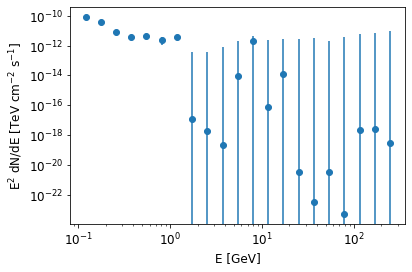

In [151]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['e2dnde']*1e-6), 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

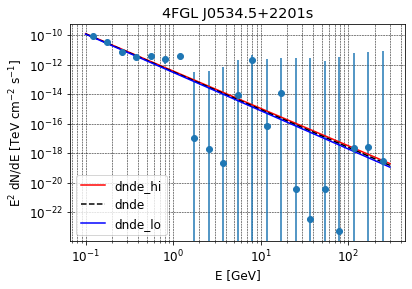

In [152]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

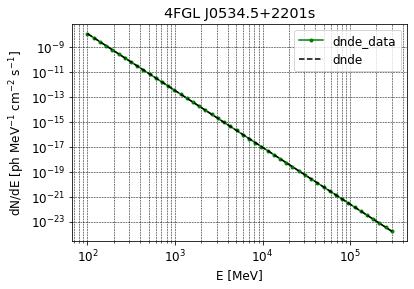

In [153]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

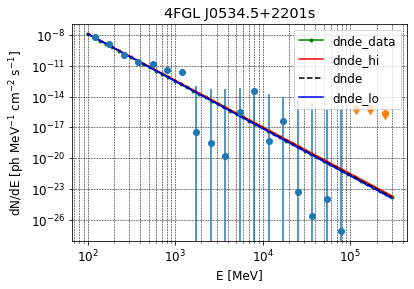

In [154]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.errorbar(sed2201s['e_ctr'][:-3],
             1*sed2201s['dnde'][:-3], 
             yerr=sed2201s['dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-3:]),
         sed2201s['dnde_ul95'][-3:], yerr=0.2*sed2201s['dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

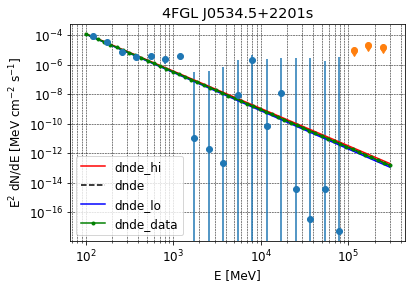

In [155]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.errorbar(sed2201s['e_ctr'][:-3],
             1*sed2201s['e2dnde'][:-3], 
             yerr=sed2201s['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-3:]),
         sed2201s['e2dnde_ul95'][-3:], yerr=0.2*sed2201s['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

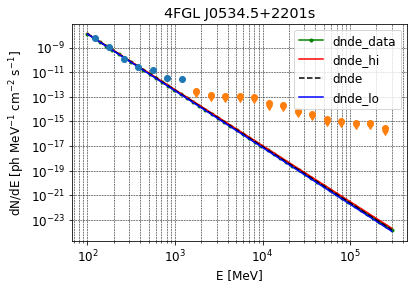

In [156]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.errorbar(sed2201s['e_ctr'][:-14],
             1*sed2201s['dnde'][:-14], 
             yerr=sed2201s['dnde_err'][:-14], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-14:]),
         sed2201s['dnde_ul95'][-14:], yerr=0.2*sed2201s['dnde_ul95'][-14:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

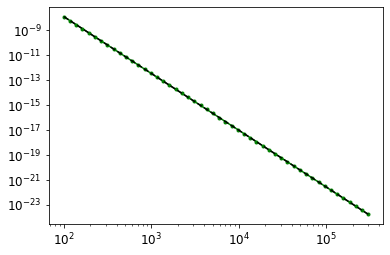

In [157]:
plt.loglog(E, powerlaw(Prefactor2201s,Index2201s,Scale2201s,E),'g.-', label='dnde_data')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.show()

In [158]:
(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E) - (dnde))*100/(dnde)

array([-0.98001973, -0.97769542, -0.97537106, -0.97304664, -0.97072217,
       -0.96839764, -0.96607306, -0.96374843, -0.96142373, -0.95909899,
       -0.95677419, -0.95444934, -0.95212443, -0.94979947, -0.94747445,
       -0.94514938, -0.94282425, -0.94049907, -0.93817383, -0.93584854,
       -0.9335232 , -0.9311978 , -0.92887234, -0.92654683, -0.92422127,
       -0.92189565, -0.91956998, -0.91724425, -0.91491847, -0.91259263,
       -0.91026674, -0.9079408 , -0.9056148 , -0.90328874, -0.90096263,
       -0.89863647, -0.89631025, -0.89398398, -0.89165765, -0.88933127,
       -0.88700483, -0.88467834, -0.88235179, -0.88002519, -0.87769854,
       -0.87537183, -0.87304506, -0.87071824, -0.86839137, -0.86606444])

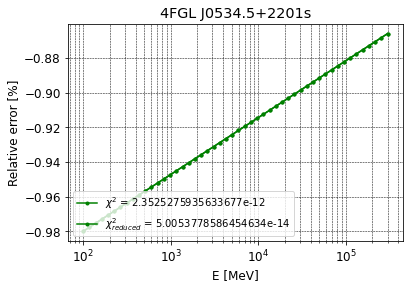

In [159]:
chi2201s = chisquare(dnde, f_exp=(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E)))
rechi2201s = chi2201s[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201s[0]))
plt.plot(E,(powerlaw(Prefactor2201s,Index2201s,Scale2201s,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201s))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [160]:
chi2201s

Power_divergenceResult(statistic=2.3525275935633677e-12, pvalue=1.0)

In [161]:
rechi2201s

5.0053778586454634e-14

In [162]:
m = dnde*1e-6
n = powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E/1e3)*1e-27

In [163]:
m = np.array([16, 18, 16, 14, 12, 12])
n = np.array([16, 16, 16, 16, 16, 8])

In [164]:
m

array([16, 18, 16, 14, 12, 12])

In [165]:
n

array([16, 16, 16, 16, 16,  8])

In [166]:
1.27584663e-14 - 6.50779832e-15

6.250667980000001e-15

In [167]:
(m-n)**2/n

array([0.  , 0.25, 0.  , 0.25, 1.  , 2.  ])

In [168]:
np.sum(((m-n)**2)/n)

3.5

In [169]:
a = chisquare(dnde, f_exp=((powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E))))

In [170]:
a[0]

96546774739.54556

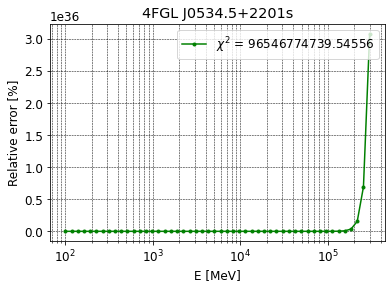

In [171]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

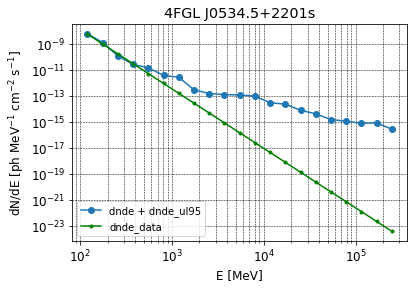

In [172]:
xerror2201s = np.append(sed2201s['e_ctr'][:-14],sed2201s['e_ctr'][-14:])
yerror2201s = np.append(sed2201s['dnde'][:-14],sed2201s['dnde_ul95'][-14:])
sedyerror2201s = sed2201s['dnde']
plt.loglog(xerror2201s, yerror2201s,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2201s, powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()

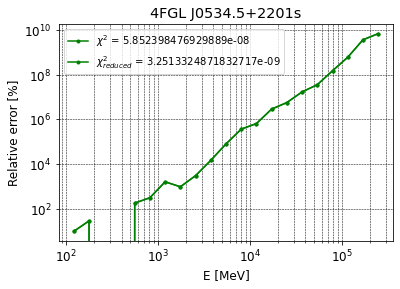

In [173]:
chi2201s = chisquare(yerror2201s, f_exp= powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))
rechi2201s = chi2201s[0]/(21-3)
plt.plot(xerror2201s,(yerror2201s-powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201s[0]))
plt.plot(xerror2201s,(yerror2201s-(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201s))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

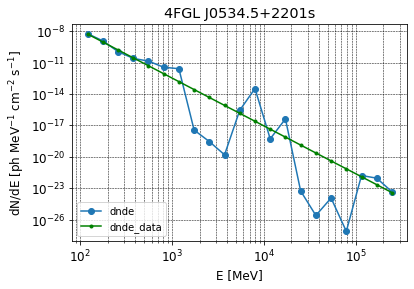

In [174]:
plt.loglog(xerror2201s, sedyerror2201s,"o-",label='dnde')
plt.loglog(xerror2201s, powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [228]:
#dnde+uldnde_95
error2201s = np.append(sed2201s['dnde_err'][:-14],0.2*sed2201s['dnde_ul95'][-14:])
Chi_Square = ((yerror2201s- powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))/error2201s)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2201s['dnde'] - powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))/sed2201s['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [33.50667235 54.26973098 10.1609084   0.17081234  5.87797905  2.20412324
  6.95049521 20.5262325  23.43085264 24.66441805 24.93771008 24.98639979
 24.99235706 24.99828078 24.99912292 24.99970761 24.9998606  24.99996691
 24.99999178 24.99999864 24.99999928]
sum_Chi_Square = 456.675620224722
reduced_Chi_Square_dnde+uldnde_95 = 25.370867790262334
Chi_Square_dnde_data = [3.35066723e+01 5.42697310e+01 1.01609084e+01 1.70812339e-01
 5.87797905e+00 2.20412324e+00 6.95049521e+00 5.49407164e-02
 6.37591992e-03 2.27473360e-04 4.16308525e-06 8.68369382e-01
 5.25535421e-08 1.81153351e-05 9.44128718e-10 1.07668415e-10
 3.74358258e-11 1.61293876e-12 7.38064691e-15 7.65624167e-14
 2.84997914e-17]
sum_Chi_Square_dnde_data = 114.07065739651387
reduced_Chi_Square_dnde_data = 6.337258744250771


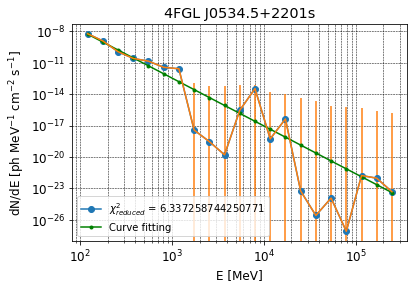

In [176]:
plt.loglog(xerror2201s, sed2201s['dnde'],"o-", label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.loglog(xerror2201s, powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s),'g.-',label='Curve fitting')
plt.errorbar(np.array(sed2201s['e_ctr']),
             sed2201s['dnde'], 
             yerr=sed2201s['dnde_err'], )
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left',fontsize=10)
plt.show()

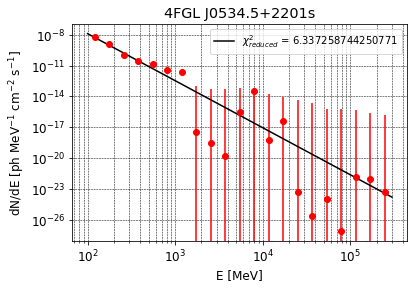

In [230]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'k-' )
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'k.-')
plt.loglog(E, dnde2201s, '-',color='black', label=r'$\chi_{reduced}^{2}$ = %a' %float(reduced_Chi_Square))
plt.errorbar(np.array(sed2201s['e_ctr']),
             sed2201s['dnde'], 
             yerr=sed2201s['dnde_err'], fmt ='ro')

#plt.ylim(5e-12,9e-10)
#plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

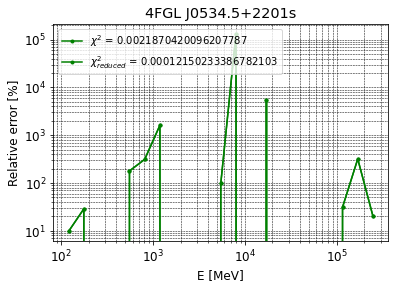

In [177]:
chi2201s = chisquare(yerror2201s, f_exp= sedyerror2201s)
rechi2201s = chi2201s[0]/(21-3)

plt.plot(xerror2201s,(sedyerror2201s-powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2201s[0]))
plt.plot(xerror2201s,(sedyerror2201s-powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s))*100/(powerlaw(Prefactor2201s,Index2201s,Scale2201s,xerror2201s)),'g.-',  
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2201s))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [178]:
Prefactor2201s = 2.88*1e-07
Index2201s = 4.57
Scale2201s = 50.5

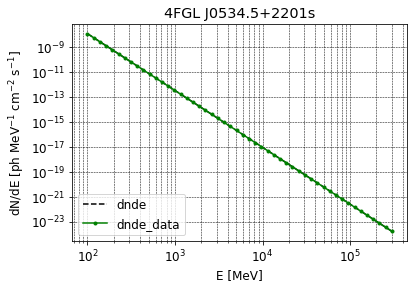

In [179]:

plt.loglog(E, dnde, 'k--',label ='dnde')

plt.loglog(E, powerlaw(Prefactor2201s,-Index2201s,Scale2201s,E),'g.-', label='dnde_data')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [180]:
Prefactor2238=1.45*1e-13
Index2238=-3.12
Scale2238=1.68e+03

In [181]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


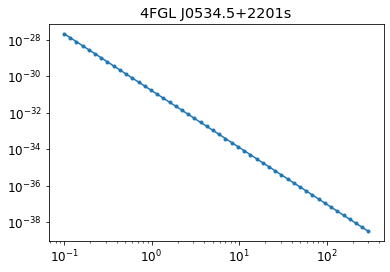

In [182]:
plt.loglog(E/1e3, powerlaw(Prefactor2238,Index2238,Scale2238,E/1e3)*1e-28,'.-', label='dnde_data')
plt.title('4FGL J0534.5+2201s')
plt.show()

In [183]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-05-17 09:11:18 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-05-17 09:11:25 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-17 09:11:25 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2200     : ['Index1', 'Expfactor']
2022-05-17 09:11:25 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201s    : ['Index']
2022-05-17 09:11:25 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-05-17 09:11:25 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0526.3+2246     : ['Index']
2022-05-17 09:11:25 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0544.4+2238     : ['Index']
2022-05-17 09:11:25 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
2022-05-17 09:11:36 INFO    GTAnalysis.sed(): Finished SED
2022-05-17 09:11:43 INFO    GTAnalysis.sed(): Execution time: 25.32 s


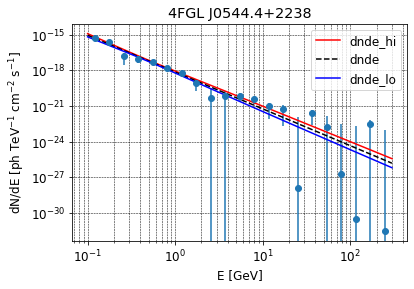

In [184]:
plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['dnde']*1e-6, 
             yerr=sed2238['dnde_err']*1e-6, fmt ='o')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

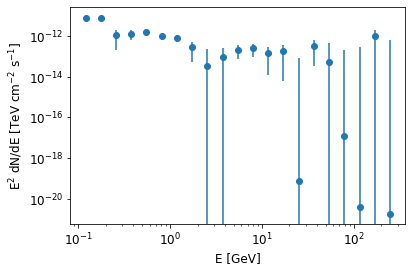

In [185]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

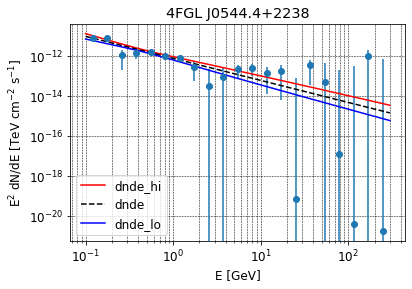

In [186]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()

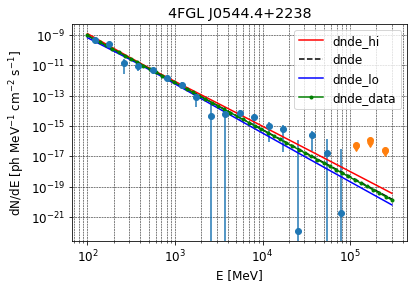

In [187]:

plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.errorbar(sed2238['e_ctr'][:-3],
             1*sed2238['dnde'][:-3], 
             yerr=sed2238['dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-3:]),
         sed2238['dnde_ul95'][-3:], yerr=0.2*sed2238['dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

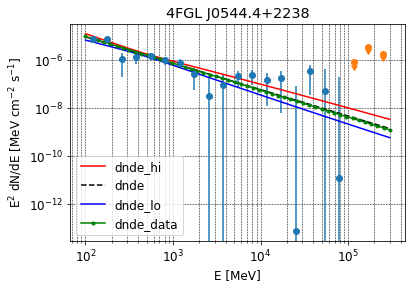

In [188]:
plt.loglog(E, (E**2)*dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, (E**2)*dnde, 'k--',label ='dnde')
plt.loglog(E, (E**2)*dnde_lo, 'blue',label ='dnde_lo')
plt.loglog(E, (E**2)*powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.errorbar(sed2238['e_ctr'][:-3],
             1*sed2238['e2dnde'][:-3], 
             yerr=sed2238['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-3:]),
         sed2238['e2dnde_ul95'][-3:], yerr=0.2*sed2238['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^2$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()

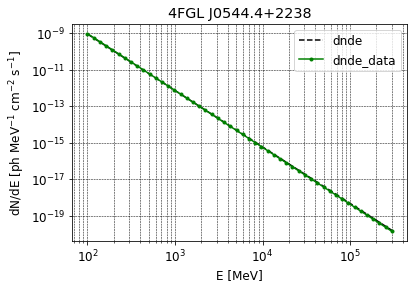

In [189]:
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
plt.show()

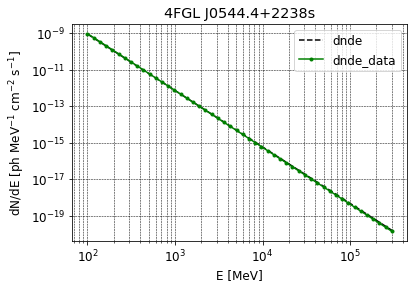

In [190]:
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238s')
plt.legend(loc='upper right')
plt.show()
plt.show()

In [191]:
a = chisquare(dnde, f_exp=(powerlaw(Prefactor2238,-Index2238,Scale2238,E)))

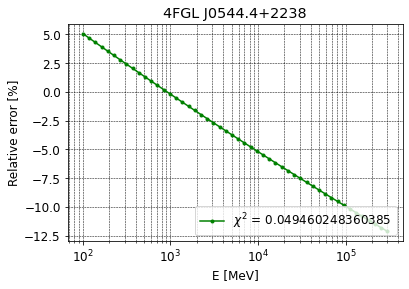

In [192]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2238,Index2238,Scale2238,E)) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

No handles with labels found to put in legend.


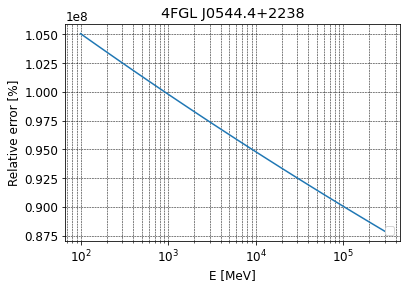

In [193]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,((powerlaw(Prefactor2238,Index2238,Scale2238,E) - (dnde*1e-6))*100/(dnde*1e-6))),'g.-', 
label=r'$\chi^{2}$ = %a' %float(a[0])
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

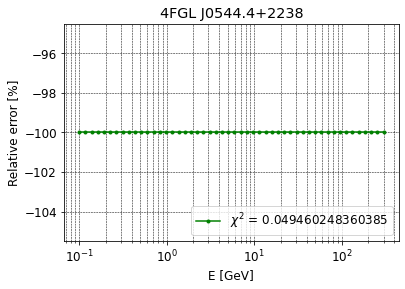

In [194]:
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E/1e3,((powerlaw(Prefactor2238,-Index2238,Scale2238,E/1e3)*1e-28) - (dnde*1e-6))*100/(dnde*1e-6),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(a[0]))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.xscale('log')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

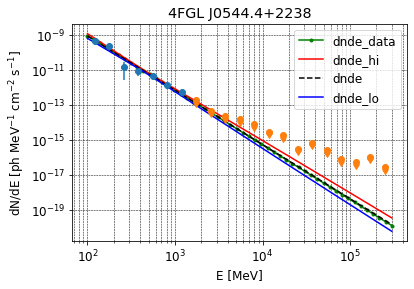

In [195]:
plt.loglog(E, powerlaw(Prefactor2238,Index2238,Scale2238,E),'g.-', label='dnde_data')
plt.loglog(E, dnde_hi, 'r', label='dnde_hi')
plt.loglog(E, dnde, 'k--',label ='dnde')
plt.loglog(E, dnde_lo, 'blue',label ='dnde_lo')
plt.errorbar(sed2238['e_ctr'][:-14],
             1*sed2238['dnde'][:-14], 
             yerr=sed2238['dnde_err'][:-14], fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-14:]),
         sed2238['dnde_ul95'][-14:], yerr=0.2*sed2238['dnde_ul95'][-14:], 
             fmt='o', uplims=True)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

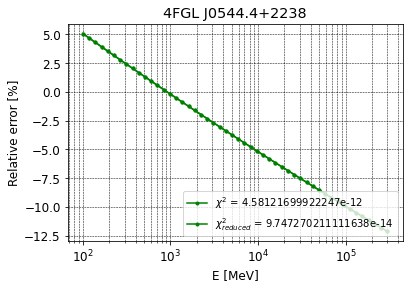

In [196]:
chi2238 = chisquare(dnde, f_exp=(powerlaw(Prefactor2238,Index2238,Scale2238,E)))
rechi2238 = chi2238[0]/(50-3)
#print(chisquare(dnde*1e-6, f_exp=(powerlaw(Prefactor2246,Index2246,Scale2246,E/1e3)*1e-29)))
plt.plot(E,(powerlaw(Prefactor2238,Index2238,Scale2238,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2238[0]))
plt.plot(E,(powerlaw(Prefactor2238,Index2238,Scale2238,E) - (dnde))*100/(dnde),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2238))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower right',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [197]:
chi2238

Power_divergenceResult(statistic=4.58121699922247e-12, pvalue=1.0)

In [198]:
rechi2238

9.747270211111638e-14

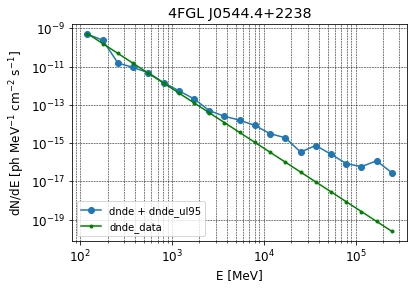

In [199]:
xerror2238 = np.append(sed2238['e_ctr'][:-14],sed2238['e_ctr'][-14:])
yerror2238 = np.append(sed2238['dnde'][:-14],sed2238['dnde_ul95'][-14:])
sedyerror2238 = sed2238['dnde']
plt.loglog(xerror2238, yerror2238,"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2238, powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left',fontsize=10)
plt.show()

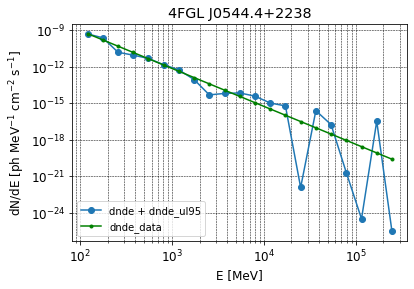

In [200]:
xerror2238 = np.append(sed2238['e_ctr'][:-14],sed2238['e_ctr'][-14:])
yerror2238 = np.append(sed2238['dnde'][:-14],sed2238['dnde_ul95'][-14:])
sedyerror2238 = sed2238['dnde']
plt.loglog(xerror2238, sed2238['dnde'],"o-",label='dnde + dnde_ul95')
plt.loglog(xerror2238, powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238),'g.-', label='dnde_data')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left',fontsize=10)
plt.show()

In [201]:
#dnde+uldnde_95
error2238 = np.append(sed2238['dnde_err'][:-14],0.2*sed2238['dnde_ul95'][-14:])
Chi_Square = ((yerror2238- powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))/error2238)**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde+uldnde_95 =' ,Chi_Square)
print('sum_Chi_Square =',sum_Chi_Square)
print('reduced_Chi_Square_dnde+uldnde_95 =', reduced_Chi_Square)
#dnde_data
Chi_Square = ((sed2238['dnde'] - powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))/sed2238['dnde_err'])**2
sum_Chi_Square = np.sum(Chi_Square)
reduced_Chi_Square = sum_Chi_Square/(len(Chi_Square)-3)
print('Chi_Square_dnde_data =' ,Chi_Square)
print('sum_Chi_Square_dnde_data =',sum_Chi_Square)
print('reduced_Chi_Square_dnde_data =', reduced_Chi_Square)

Chi_Square_dnde+uldnde_95 = [1.09132950e-01 5.10271156e+00 7.06301088e+00 1.71207170e+00
 2.73366948e-02 1.69279506e-02 3.91483450e-01 3.65370312e+00
 1.30333344e+00 7.04755518e+00 1.49176343e+01 1.89133004e+01
 1.99450258e+01 2.24073600e+01 2.06895754e+01 2.43765048e+01
 2.44600064e+01 2.44928350e+01 2.47756215e+01 2.49660990e+01
 2.49565817e+01]
sum_Chi_Square = 271.3278112775661
reduced_Chi_Square_dnde+uldnde_95 = 15.073767293198118
Chi_Square_dnde_data = [1.09132950e-01 5.10271156e+00 7.06301088e+00 1.71207170e+00
 2.73366948e-02 1.69279506e-02 3.91483450e-01 3.29765093e-01
 1.34904775e+00 2.44880348e-01 5.43427160e-01 1.32928568e+00
 5.45522236e-01 7.39290637e-01 5.87547481e-02 1.14327246e+00
 1.24947179e-02 7.57440374e-04 1.48048166e-04 9.75297667e-01
 5.52074710e-06]
sum_Chi_Square_dnde_data = 21.694624693957913
reduced_Chi_Square_dnde_data = 1.2052569274421063


In [202]:
(yerror2238-(powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)))*100/( powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))

array([-6.19411138e+00,  4.98975104e+01, -6.83539497e+01, -3.96619190e+01,
        5.85349883e+00,  5.31511220e+00,  3.04535322e+01,  6.18891151e+01,
        2.95886129e+01,  1.13194450e+02,  3.39496821e+02,  6.67981266e+02,
        8.36304033e+02,  1.77716794e+03,  1.00761471e+03,  7.86899209e+03,
        9.10909671e+03,  9.70846848e+03,  2.21336601e+04,  1.47338047e+05,
        1.15008888e+05])

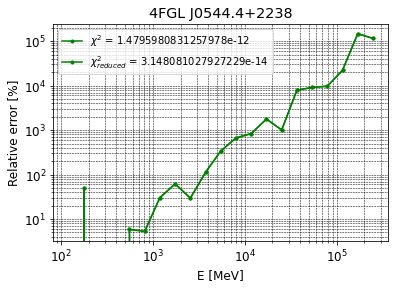

In [203]:
chi2238 = chisquare(yerror2238, f_exp=  powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238))
rechi2238 = chi2238[0]/(21-3)
plt.plot(xerror2238,(yerror2238-(powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)))*100/( powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)),'g.-', 
         label=r'$\chi^{2}$ = %a' %float(chi2246[0]))
plt.plot(xerror2238,(yerror2238-(powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)))*100/( powerlaw(Prefactor2238,Index2238,Scale2238,xerror2238)),'g.-', 
         label=r'$\chi_{reduced}^{2}$ = %a' %float(rechi2246))
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Relative error [%]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper left',fontsize=10)
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit0.png")

In [204]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde_hi2200 = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo2200 = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde2200 = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])

In [205]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi2201i = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo2201i = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde2201i = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


In [206]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])
dnde_hi2201s = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo2201s = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde2201s = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


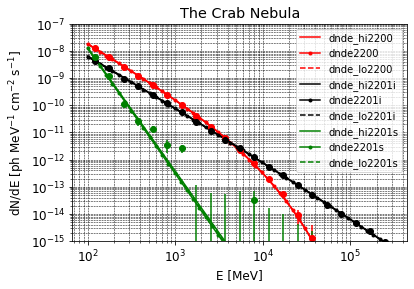

In [207]:
#2200
plt.loglog(E, dnde_hi2200, 'r-', label='dnde_hi2200')
plt.loglog(E, dnde_lo2200, 'r.-',label ='dnde2200')
plt.loglog(E, dnde2200, 'r--',label ='dnde_lo2200')
plt.errorbar(sed2200['e_ctr'],
             sed2200['dnde'], 
             yerr=sed2200['dnde_err'], fmt ='ro')
#2201i
plt.loglog(E, dnde_hi2201i , 'k-', label='dnde_hi2201i')
plt.loglog(E, dnde_lo2201i, 'k.-',label ='dnde2201i')
plt.loglog(E, dnde2201i , 'k--',label ='dnde_lo2201i')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['dnde'], 
             yerr=sed2201i['dnde_err'], fmt ='ko')
#2201s
plt.loglog(E, dnde_hi2201s, 'g-', label='dnde_hi2201s')
plt.loglog(E, dnde_lo2201s, 'g.-',label ='dnde2201s')
plt.loglog(E, dnde2201s , 'g--',label ='dnde_lo2201s')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['dnde'], 
             yerr=sed2201s['dnde_err'], fmt ='go')

plt.ylim(1e-15,1e-7)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'dN/dE [ph MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [208]:
sed2200['e2dnde']

array([1.80191480e-04, 1.86432232e-04, 1.75379652e-04, 1.75679767e-04,
       1.72847727e-04, 1.62287424e-04, 1.50766337e-04, 1.27757387e-04,
       1.07844264e-04, 8.72659305e-05, 6.61518670e-05, 4.71518181e-05,
       2.69745838e-05, 1.57380714e-05, 5.60352835e-06, 1.71905276e-06,
       4.17065300e-10, 2.95389181e-12, 4.30285544e-09, 8.48816359e-09,
       1.17220942e-11])

In [209]:
sed2200['e2dnde_err'],

(array([1.32269771e-06, 1.14595629e-06, 1.07516821e-06, 1.08666685e-06,
        1.15017429e-06, 1.22712957e-06, 1.34089631e-06, 1.46113003e-06,
        1.62178811e-06, 1.83327316e-06, 2.06458642e-06, 2.29816307e-06,
        2.48607294e-06, 2.81290731e-06, 3.11276888e-06, 3.69798834e-06,
        2.47917354e-06, 2.50386159e-06, 5.86600859e-06, 7.32923287e-06,
        8.90751240e-06]),)

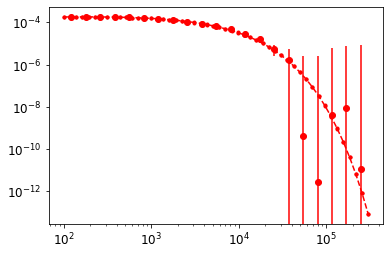

In [210]:
plt.loglog(E, dnde_hi2200*E**2, 'r.' )
plt.loglog(E, dnde_lo2200*E**2, 'r.')
plt.loglog(E, dnde2200*E**2, 'r--',label ='Crab Pulsar')
plt.errorbar(sed2200['e_ctr'],
             sed2200['e2dnde'], 
             yerr=sed2200['e2dnde_err'], fmt ='ro')
plt.show()

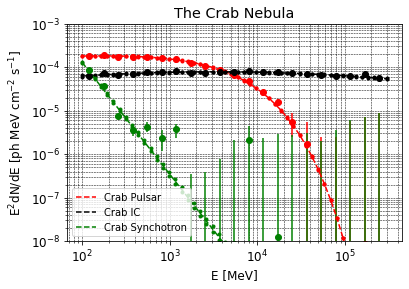

In [211]:
#2200
plt.loglog(E, dnde_hi2200*E**2, 'r.' )
plt.loglog(E, dnde_lo2200*E**2, 'r.')
plt.loglog(E, dnde2200*E**2, 'r--',label ='Crab Pulsar')
plt.errorbar(sed2200['e_ctr'],
             sed2200['e2dnde'], 
             yerr=sed2200['e2dnde_err'], fmt ='ro')
#2201i
plt.loglog(E, dnde_hi2201i*E**2 , 'k.')
plt.loglog(E, dnde_lo2201i*E**2, 'k.')
plt.loglog(E, dnde2201i*E**2 , 'k--',label ='Crab IC')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['e2dnde'], 
             yerr=sed2201i['e2dnde_err'], fmt ='ko')
#2201s
plt.loglog(E, dnde_hi2201s*E**2, 'g.')
plt.loglog(E, dnde_lo2201s*E**2, 'g.')
plt.loglog(E, dnde2201s*E**2 , 'g--',label ='Crab Synchotron')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['e2dnde'], 
             yerr=sed2201s['e2dnde_err'], fmt ='go')

plt.ylim(1e-8,1e-3)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph MeV cm$^{-2}$ s$^{-1}$]')
plt.title('The Crab Nebula')
plt.legend(loc='lower left',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [212]:
E

array([1.00000000e+02, 1.17750194e+02, 1.38651083e+02, 1.63261919e+02,
       1.92241227e+02, 2.26364419e+02, 2.66544543e+02, 3.13856718e+02,
       3.69566895e+02, 4.35165737e+02, 5.12408501e+02, 6.03362006e+02,
       7.10459935e+02, 8.36567954e+02, 9.85060392e+02, 1.15991053e+03,
       1.36579690e+03, 1.60822850e+03, 1.89369219e+03, 2.22982623e+03,
       2.62562472e+03, 3.09167821e+03, 3.64045711e+03, 4.28664532e+03,
       5.04753319e+03, 5.94348015e+03, 6.99845942e+03, 8.24069957e+03,
       9.70343977e+03, 1.14258192e+04, 1.34539243e+04, 1.58420220e+04,
       1.86540117e+04, 2.19651350e+04, 2.58639892e+04, 3.04548975e+04,
       3.58607011e+04, 4.22260452e+04, 4.97212503e+04, 5.85468688e+04,
       6.89390519e+04, 8.11758676e+04, 9.55847418e+04, 1.12551219e+05,
       1.32529279e+05, 1.56053484e+05, 1.83753281e+05, 2.16369845e+05,
       2.54775913e+05, 2.99999133e+05])

No handles with labels found to put in legend.


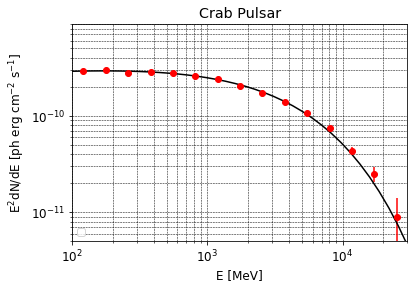

In [213]:
#2200
#plt.loglog(E, 1.6*dnde_hi2200*E**2*1e-6, 'k-' )
#plt.loglog(E, 1.6*dnde_lo2200*E**2*1e-6, 'k.-')
plt.loglog(E, 1.6*dnde2200*E**2*1e-6, '-',color='black')
plt.errorbar(sed2200['e_ctr'],
             1.6*sed2200['e2dnde']*1e-6, 
             yerr=1.6*sed2200['e2dnde_err']*1e-6, fmt ='ro')

plt.ylim(5e-12,9e-10)
plt.xlim(1e2,3e4)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title('Crab Pulsar')
plt.legend(loc='lower left',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

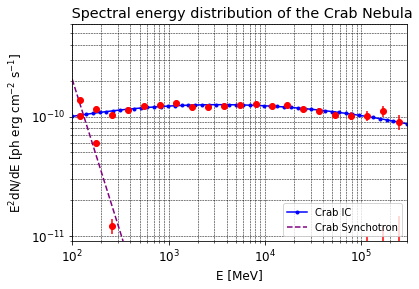

In [214]:
#2200
#plt.loglog(E, dnde_hi2200*E**2*1.6*1e-6, 'r-' )
#plt.loglog(E, dnde_lo2200*E**2*1.6*1e-6, 'r.-',label ='dnde2200')
#plt.loglog(E, dnde2200*E**2*1.6*1e-6, 'r--')
#plt.errorbar(sed2200['e_ctr'],
#             sed2200['e2dnde'], 
#             yerr=sed2200['e2dnde_err'], fmt ='ro')
#2201i
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.loglog(E, dnde2201i*E**2*1.6*1e-6, '.-',color='Blue',label ='Crab IC')
#plt.loglog(E, dnde_hi2201i*E**2*1.6*1e-6 , '--',color='purple')
plt.errorbar(sed2201i['e_ctr'],
             sed2201i['e2dnde']*1.6*1e-6, 
             yerr=sed2201i['e2dnde_err']*1.6*1e-6, fmt ='ro')
#2201s
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6, 'g-')
plt.loglog(E, dnde2201s*E**2*1.6*1e-6, '--',color='purple',label ='Crab Synchotron')
#plt.loglog(E, dnde_hi2201s*E**2*1.6*1e-6 , 'g--')
plt.errorbar(sed2201s['e_ctr'],
             1*sed2201s['e2dnde']*1.6*1e-6, 
             yerr=sed2201s['e2dnde_err']*1.6*1e-6, fmt ='ro')

plt.ylim(9e-12,6e-10)
plt.xlim(1e2,3e5)
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$dN/dE [ph erg cm$^{-2}$ s$^{-1}$]')
plt.title(' Spectral energy distribution of the Crab Nebula')
plt.legend(loc='lower right',prop={'size': 10})
plt.show()
#plt.savefig("Crab_5_bin_6/J0526.3+2246_curvefit.png")

In [215]:
gta.print_params()

2022-05-17 09:11:52 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.08     0.604     1e-05     1e+03     1e-14    *
   1 Index                     2.95     0.286         0         5        -1    *
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.24   0.00862     1e-05     1e+03     1e-10    *
   4 Index1                     1.9   0.00394         0         5        -1    *
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                  0.5  3.71e-05      -0.5       0.5      0.01    *
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.769   0.00814     1e-05     1e+03     1e-12    

In [216]:
from scipy.integrate import quad
Prefactor2201s = 2.88*1e-07
Index2201s = -4.57
Scale2201s = 50.5

In [217]:
def powerlaw(p_0,p_1,x_s,x):
    F = p_0*(x/x_s)**p_1
    return F

In [218]:
def integrand(x,p_0,p_1,x_s):
    return p_0*(x/x_s)**p_1
p_0=2.88*1e-07
p_1=-4.57
x_s=50.5
I = quad(integrand, 1e2, 5e2, args=(p_0,p_1,x_s))

In [219]:
I[0]

3.5430347855087355e-07

In [220]:
F = (2.88*1e-07*50.5**(4.57)*(3e5**(-4.57+1)-1e2**(-4.57+1))/(-4.57+1))
print(F)

3.554396475972241e-07
